<h1 style="text-align:center;color:#131313"> Individual Assignment</h1>
<h2>Description</h2>
<p>here I</p>
<author>Mohammad Hadi adlipour Motlagh</author>

<h2>Data Exploration</h2>

### 1. Import all required libraries and datasets

In [306]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
# Data Manipulation
library(data.table)    # Data manipulate
library(dummies)       # Data processing
library(tidyverse)     # Data Manipulation
library(dplyr)         # Data Manipulation

# Visualizatin
library(ggplot2)       # Visualization
library(gridExtra)     # Visualization
library(plotrix)       # Draw circle


# Feature Selection
library(leaps)

# Machin Learnin Models
library(mlr)           # ML toolkit
library(caret)         # ML toolkit
library(rgl)           # 3D plots
library(e1071)         # Evaluation
library(kknn)          # kNN model
library(nnet)          # One-vs-All Logistic Regression
library(tree)          # CART model
library(randomForest)  # Bagging and RF
library(gbm)           # Boosting tree
library(glmnet)        # Rgid and Lasso Regression Models
library(pls)
library(mgcv)          # GAM
library(sp)

# Evaluation
library(pROC)          # AUC, ROC

# Resize plot
library(repr)  # String and binary representations
# options(repr.plot.width=4, repr.plot.height=4)

R.version.string

[1] "R version 4.0.5 (2021-03-31)"

### 2. Loading The Data

In [61]:
# Input data
# cust_id                          : Custometr ID
# LIMIT_BAL                        : Limit of the Balance (float)
# SEX                              : Gender (binary)
# EDUCATION                        : Education level (Categorical)
# MARRIAGE                         : Status (binary)
# AGE                              : Age (integer)
# PAY_0                            : Payment of month 0 (integer)
# PAY_2                            : Payment of month 2 (integer)
# PAY_3                            : Payment of month 3 (integer)
# PAY_4                            : Payment of month 4 (integer)
# PAY_5                            : Payment of month 5 (integer)
# PAY_6                            : Payment of month 6 (integer)
# BILL_AMT1                        : Bill Amount of month 1 (integer)
# BILL_AMT2                        : Bill Amount of month 2 (integer)
# BILL_AMT3                        : Bill Amount of month 3 (integer)
# BILL_AMT4                        : Bill Amount of month 4 (integer)
# BILL_AMT5                        : Bill Amount of month 5 (integer)
# BILL_AMT6                        : Bill Amount of month 6 (integer)
# PAY_AMT1                         : ATM withdrawal Month 1 (integer)
# PAY_AMT2                         : ATM withdrawal Month 2 (integer)
# PAY_AMT3                         : ATM withdrawal Month 3 (integer)
# PAY_AMT4                         : ATM withdrawal Month 4 (integer)
# PAY_AMT5                         : ATM withdrawal Month 5 (integer)
# PAY_AMT6                         : ATM withdrawal Month 6 (integer)
# default.payment.next.month       : if the payment is default or no for next month (binary)
# reading the table
credit <- read.csv('./Data/credit_default_train.csv', row.names=1)
#straucture  of the data
str(credit)

'data.frame':	20000 obs. of  24 variables:
 $ LIMIT_BAL                 : int  70000 390000 60000 140000 50000 20000 50000 250000 320000 300000 ...
 $ SEX                       : int  1 2 1 2 1 1 1 1 2 1 ...
 $ EDUCATION                 : int  3 2 1 2 1 2 3 2 2 1 ...
 $ MARRIAGE                  : int  2 2 2 1 2 2 2 2 2 1 ...
 $ AGE                       : int  34 26 27 55 29 37 44 30 36 35 ...
 $ PAY_0                     : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_2                     : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_3                     : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_4                     : int  0 0 0 0 0 0 2 -1 -2 0 ...
 $ PAY_5                     : int  0 0 0 0 0 0 0 2 -2 0 ...
 $ PAY_6                     : int  0 0 2 0 -2 0 0 -1 -2 0 ...
 $ BILL_AMT1                 : int  53972 185111 21387 108038 7881 20009 NA 5724 29862 91282 ...
 $ BILL_AMT2                 : int  23149 172865 22416 110216 10415 20602 50525 6729 33785 45885 ...
 $ BILL_AMT3                 : int 

### 3. Preprocessing dealing with NAs

In [62]:
print(paste('number of null values in LIMIT BALANC Column is equal to:',sum(is.na(credit$LIMIT_BAL))))
print(paste('number of null values in Gender Column is equal to:',sum(is.na(credit$SEX))))
print(paste('number of null values in EDUCATION Column is equal to:',sum(is.na(credit$ EDUCATION))))
print(paste('number of null values in MARRIAGE Column is equal to:',sum(is.na(credit$MARRIAGE))))
print(paste('number of null values in AGE Column is equal to:',sum(is.na(credit$AGE))))
print(paste('number of null values in PAY_0 Column is equal to:',sum(is.na(credit$PAY_0))))
print(paste('number of null values in PAY_2 Column is equal to:',sum(is.na(credit$PAY_2))))
print(paste('number of null values in PAY_3 Column is equal to:',sum(is.na(credit$PAY_3))))
print(paste('number of null values in PAY_4 Column is equal to:',sum(is.na(credit$PAY_4))))
print(paste('number of null values in PAY_5 Column is equal to:',sum(is.na(credit$PAY_5))))
print(paste('number of null values in PAY_5 Column is equal to:',sum(is.na(credit$PAY_6))))
print(paste('number of null values in LIMIT BILL_AMT1 is equal to:',sum(is.na(credit$BILL_AMT1))))
print(paste('number of null values in LIMIT BILL_AMT2 is equal to:',sum(is.na(credit$BILL_AMT2))))
print(paste('number of null values in LIMIT BILL_AMT3 is equal to:',sum(is.na(credit$BILL_AMT3))))
print(paste('number of null values in LIMIT BILL_AMT4 is equal to:',sum(is.na(credit$BILL_AMT4))))
print(paste('number of null values in LIMIT BILL_AMT5 is equal to:',sum(is.na(credit$BILL_AMT5))))
print(paste('number of null values in LIMIT BILL_AMT6 is equal to:',sum(is.na(credit$BILL_AMT6))))
print(paste('number of null values in LIMIT PAY_AMT1 is equal to:',sum(is.na(credit$PAY_AMT1))))
print(paste('number of null values in LIMIT PAY_AMT2 is equal to:',sum(is.na(credit$PAY_AMT2))))
print(paste('number of null values in LIMIT PAY_AMT3 is equal to:',sum(is.na(credit$PAY_AMT3))))
print(paste('number of null values in LIMIT PAY_AMT4 is equal to:',sum(is.na(credit$PAY_AMT4))))
print(paste('number of null values in LIMIT PAY_AMT5 is equal to:',sum(is.na(credit$PAY_AMT5))))
print(paste('number of null values in LIMIT PAY_AMT6 is equal to:',sum(is.na(credit$PAY_AMT6))))
print(paste('number of null values in default.payment.next.month Column is equal to:',sum(is.na(credit$default.payment.next.month))))

[1] "number of null values in LIMIT BALANC Column is equal to: 202"
[1] "number of null values in Gender Column is equal to: 161"
[1] "number of null values in EDUCATION Column is equal to: 199"
[1] "number of null values in MARRIAGE Column is equal to: 170"
[1] "number of null values in AGE Column is equal to: 214"
[1] "number of null values in PAY_0 Column is equal to: 195"
[1] "number of null values in PAY_2 Column is equal to: 219"
[1] "number of null values in PAY_3 Column is equal to: 217"
[1] "number of null values in PAY_4 Column is equal to: 199"
[1] "number of null values in PAY_5 Column is equal to: 185"
[1] "number of null values in PAY_5 Column is equal to: 203"
[1] "number of null values in LIMIT BILL_AMT1 is equal to: 185"
[1] "number of null values in LIMIT BILL_AMT2 is equal to: 209"
[1] "number of null values in LIMIT BILL_AMT3 is equal to: 175"
[1] "number of null values in LIMIT BILL_AMT4 is equal to: 165"
[1] "number of null values in LIMIT BILL_AMT5 is equal to: 1

In [63]:
#the maximum number of NA in one row
sum(is.na(credit[which.max(rowSums(is.na(credit))),]))

[1] 4

In [64]:
#Dealing With NAs
# here I use dplyr and fill NAs by most probable value of each comuln that can be median, average or the most popular
# fill NAs of all columns with Median except categorical and binary columns
# LIMIT_BAL
credit[is.na(credit$LIMIT_BAL),]$LIMIT_BAL<-median(credit$LIMIT_BAL, na.rm = TRUE)
# AGE
credit[is.na(credit$AGE),]$AGE<-median(credit$AGE, na.rm = TRUE)
# PAY_0
credit[is.na(credit$PAY_0),]$PAY_0<-median(credit$PAY_0, na.rm = TRUE)
# PAY_2
credit[is.na(credit$PAY_2),]$PAY_2<-median(credit$PAY_2, na.rm = TRUE)
# PAY_3
credit[is.na(credit$PAY_3),]$PAY_3<-median(credit$PAY_3, na.rm = TRUE)
# PAY_4
credit[is.na(credit$PAY_4),]$PAY_4<-median(credit$PAY_4, na.rm = TRUE)
# PAY_5
credit[is.na(credit$PAY_5),]$PAY_5<-median(credit$PAY_5, na.rm = TRUE)
# PAY_6
credit[is.na(credit$PAY_6),]$PAY_6<-median(credit$PAY_6, na.rm = TRUE)
# BILL_AMT1
credit[is.na(credit$BILL_AMT1),]$BILL_AMT1<-median(credit$BILL_AMT1, na.rm = TRUE)
# BILL_AMT2
credit[is.na(credit$BILL_AMT2),]$BILL_AMT2<-median(credit$BILL_AMT2, na.rm = TRUE)
# BILL_AMT3
credit[is.na(credit$BILL_AMT3),]$BILL_AMT3<-median(credit$BILL_AMT3, na.rm = TRUE)
# BILL_AMT4
credit[is.na(credit$BILL_AMT4),]$BILL_AMT4<-median(credit$BILL_AMT4, na.rm = TRUE)
# BILL_AMT5
credit[is.na(credit$BILL_AMT5),]$BILL_AMT5<-median(credit$BILL_AMT5, na.rm = TRUE)
# BILL_AMT6
credit[is.na(credit$BILL_AMT6),]$BILL_AMT6<-median(credit$BILL_AMT6, na.rm = TRUE)
# PAY_AMT1
credit[is.na(credit$PAY_AMT1),]$PAY_AMT1<-median(credit$PAY_AMT1, na.rm = TRUE)
# PAY_AMT2
credit[is.na(credit$PAY_AMT2),]$PAY_AMT2<-median(credit$PAY_AMT2, na.rm = TRUE)
# PAY_AMT3
credit[is.na(credit$PAY_AMT3),]$PAY_AMT3<-median(credit$PAY_AMT3, na.rm = TRUE)
# PAY_AMT4
credit[is.na(credit$PAY_AMT4),]$PAY_AMT4<-median(credit$PAY_AMT4, na.rm = TRUE)
# PAY_AMT5
credit[is.na(credit$PAY_AMT5),]$PAY_AMT5<-median(credit$PAY_AMT5, na.rm = TRUE)
# PAY_AMT6
credit[is.na(credit$PAY_AMT6),]$PAY_AMT6<-median(credit$PAY_AMT6, na.rm = TRUE)

In [65]:
# diferent groups
credit%>%count(SEX)
# NAs of sex with most frequent gender which is 2
credit[is.na(credit$SEX),]$SEX<-2

SEX,n
<int>,<int>
1,7855
2,11984
NA,161


In [66]:
# diferent groups
credit%>%count(EDUCATION)
# NAs of EDUCATION with most frequent group which is 2
credit[is.na(credit$ EDUCATION),]$ EDUCATION<-2

EDUCATION,n
<int>,<int>
0,8
1,6987
2,9285
3,3225
4,77
5,184
6,35
NA,199


In [67]:
# diferent groups
credit%>%count(MARRIAGE)
# NAs of MARRIAGE with most frequent group which is 2
credit[is.na(credit$MARRIAGE),]$MARRIAGE<-2

MARRIAGE,n
<int>,<int>
0,36
1,8958
2,10623
3,213
NA,170


In [82]:
# renaming the Column of Target Variable
credit<-credit%>%rename(default=default.payment.next.month)
#Saving the Base Table
fwrite(credit,'./Data/BaseTable.csv')

### 4. Data Exploration

In [83]:
# reading the table
DF <- read.csv('./Data/BaseTable.csv')
#straucture  of the data
str(DF)

'data.frame':	20000 obs. of  24 variables:
 $ LIMIT_BAL: num  70000 390000 60000 140000 50000 20000 50000 250000 320000 300000 ...
 $ SEX      : int  1 2 1 2 1 1 1 1 2 1 ...
 $ EDUCATION: int  3 2 1 2 1 2 3 2 2 1 ...
 $ MARRIAGE : int  2 2 2 1 2 2 2 2 2 1 ...
 $ AGE      : int  34 26 27 55 29 37 44 30 36 35 ...
 $ PAY_0    : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_2    : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_3    : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_4    : int  0 0 0 0 0 0 2 -1 -2 0 ...
 $ PAY_5    : int  0 0 0 0 0 0 0 2 -2 0 ...
 $ PAY_6    : int  0 0 2 0 -2 0 0 -1 -2 0 ...
 $ BILL_AMT1: int  53972 185111 21387 108038 7881 20009 22221 5724 29862 91282 ...
 $ BILL_AMT2: int  23149 172865 22416 110216 10415 20602 50525 6729 33785 45885 ...
 $ BILL_AMT3: int  23968 153795 23444 84516 3997 21255 51463 4973 4900 35329 ...
 $ BILL_AMT4: int  25559 140387 26038 72391 1047 19105 49952 9693 15813 29368 ...
 $ BILL_AMT5: int  26134 128112 28607 61298 0 19609 19584 799 0 18833 ...
 $ BILL_AMT6: in

In [71]:
sum(is.na(DF))

[1] 0

NULL

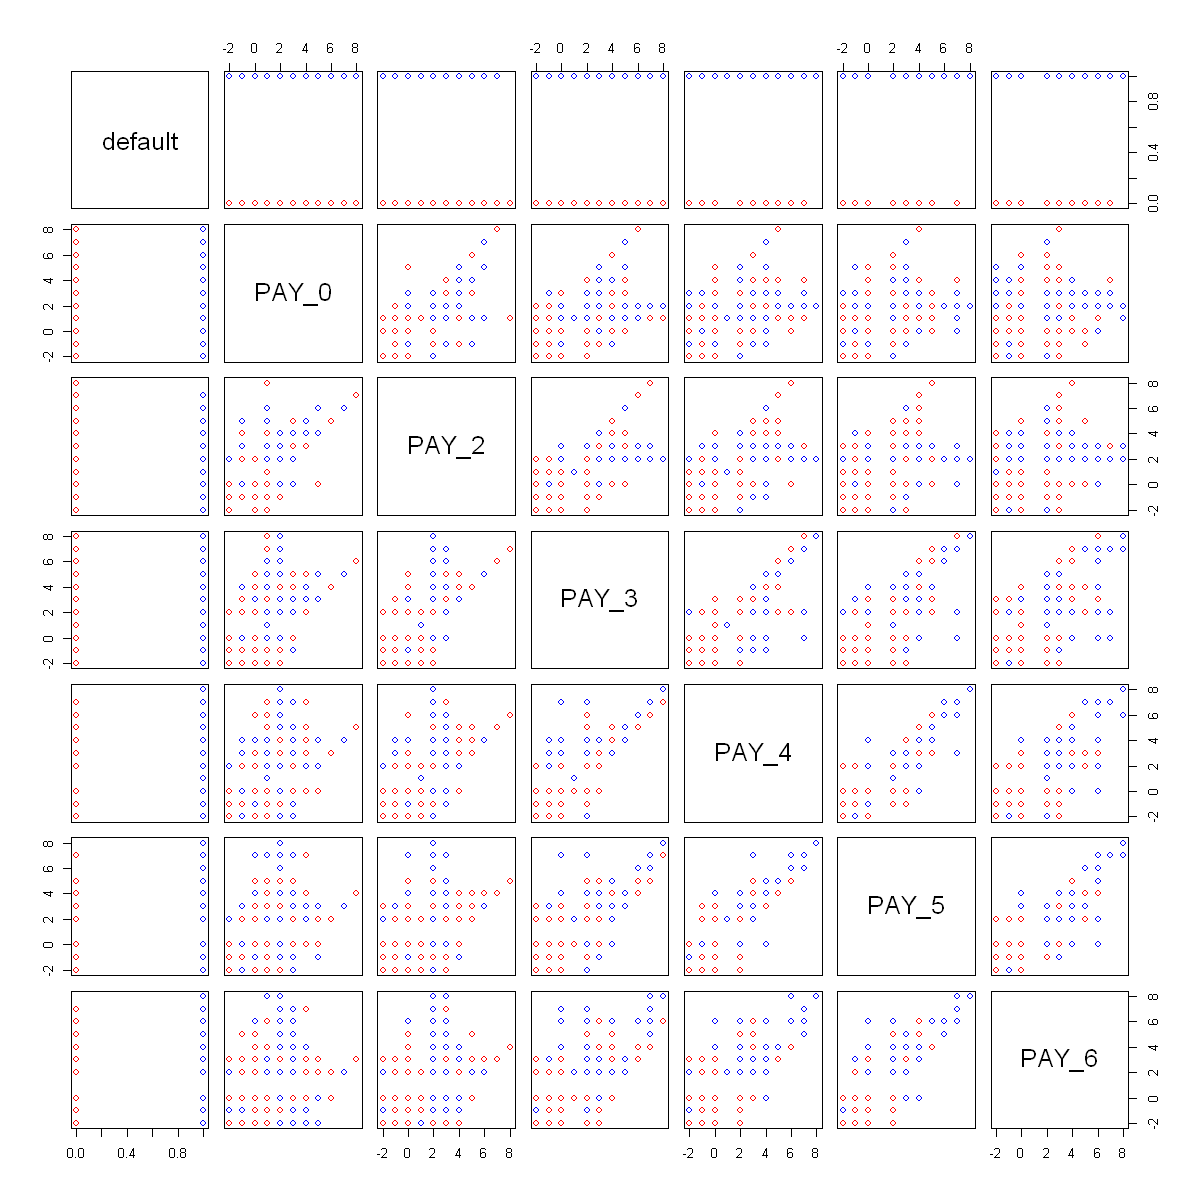

In [78]:
# Pair plot Default VS PAY
options(repr.plot.width=10, repr.plot.height=10)
cols <- rep('blue', nrow(DF))  # no default
cols[DF$default == 0] <- 'red'  # Default
D.VS.Pay<-pairs(default ~ PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + PAY_6 , data=DF, col=cols)
D.VS.Pay

NULL

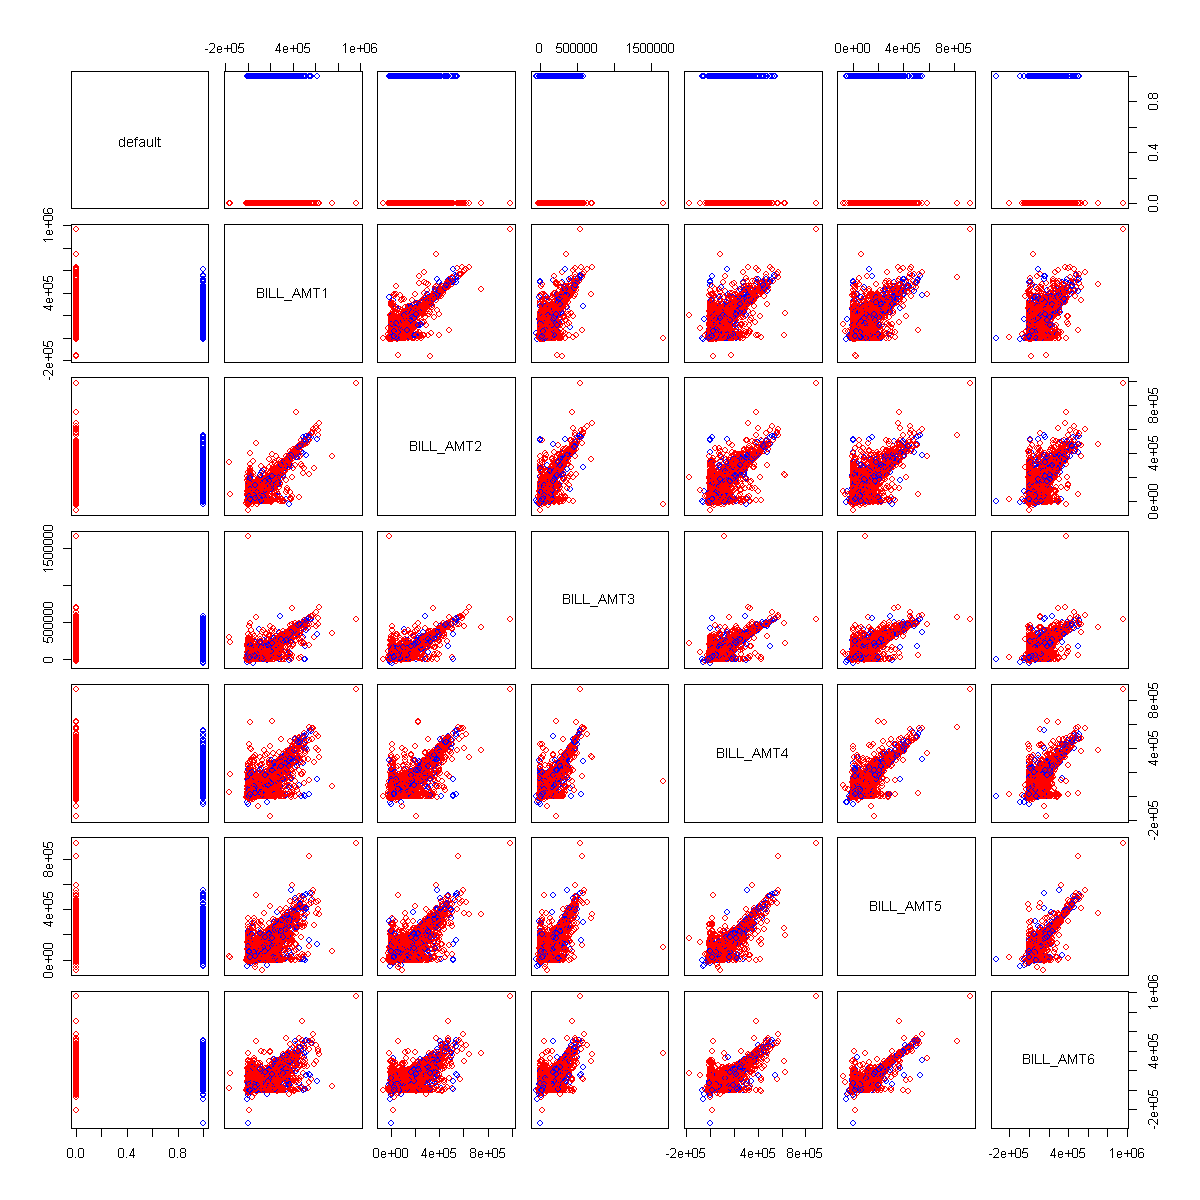

In [77]:
# Pair plot Default VS Bill
options(repr.plot.width=10, repr.plot.height=10)
cols <- rep('blue', nrow(DF))  # no default
cols[DF$default == 0] <- 'red'  # Default
D.VS.Bill<-pairs(default ~ BILL_AMT1 + BILL_AMT2 +
                 BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 , data=DF, col=cols)
D.VS.Bill

NULL

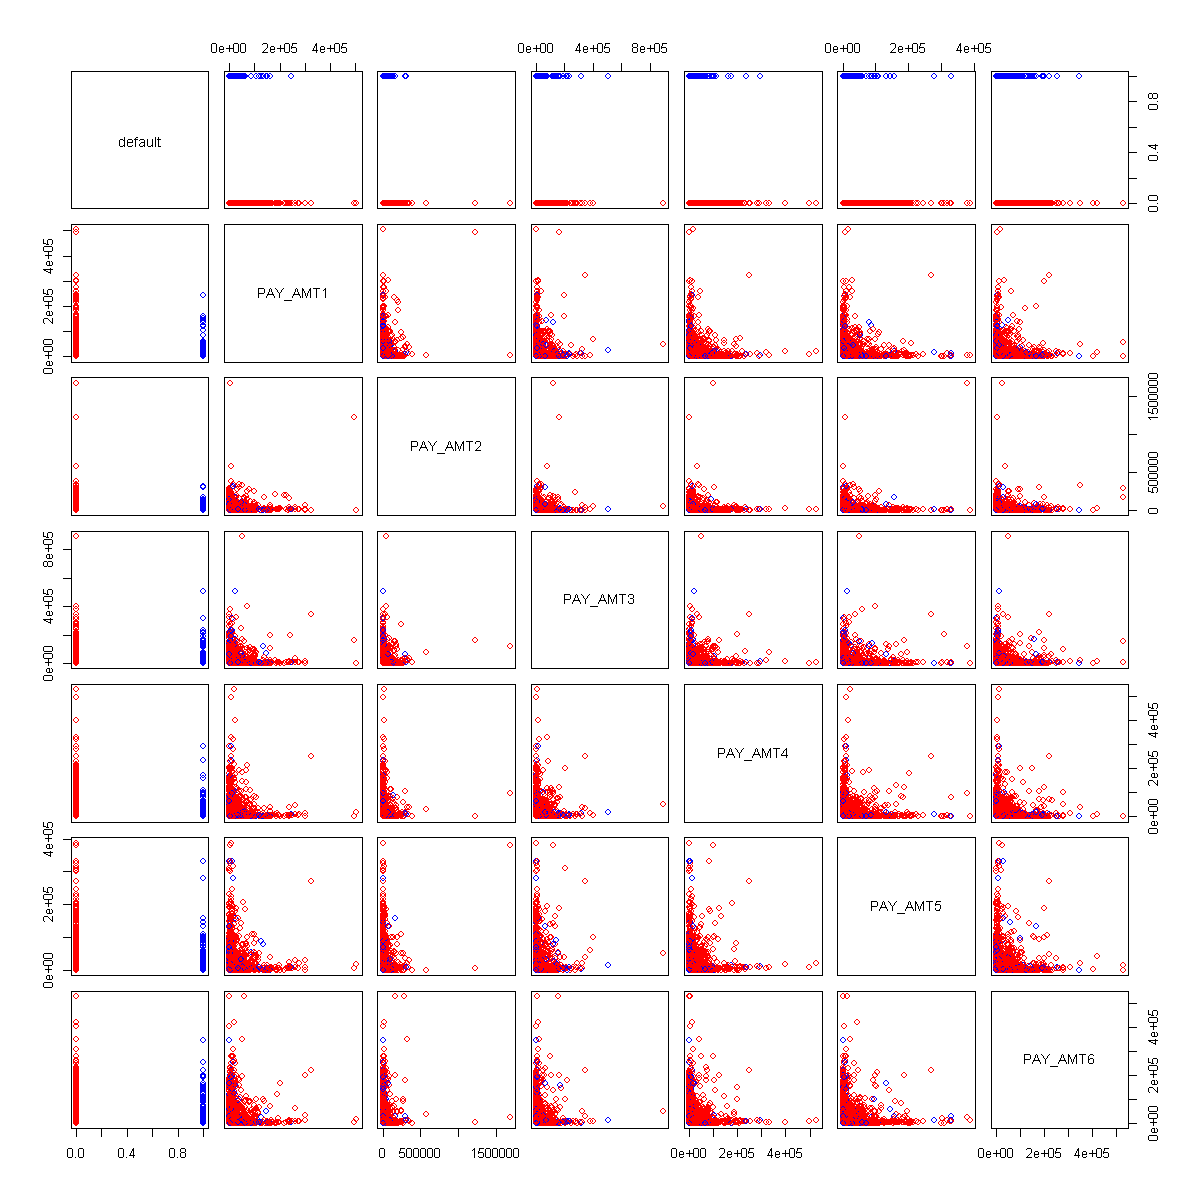

In [79]:
# Pair plot Default VS PAY_AMT
options(repr.plot.width=10, repr.plot.height=10)
cols <- rep('blue', nrow(DF))  # no default
cols[DF$default == 0] <- 'red'  # Default
D.VS.PAY_AMT<-pairs(default ~ PAY_AMT1 + PAY_AMT2 +
                 PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 , data=DF, col=cols)
D.VS.PAY_AMT

NULL

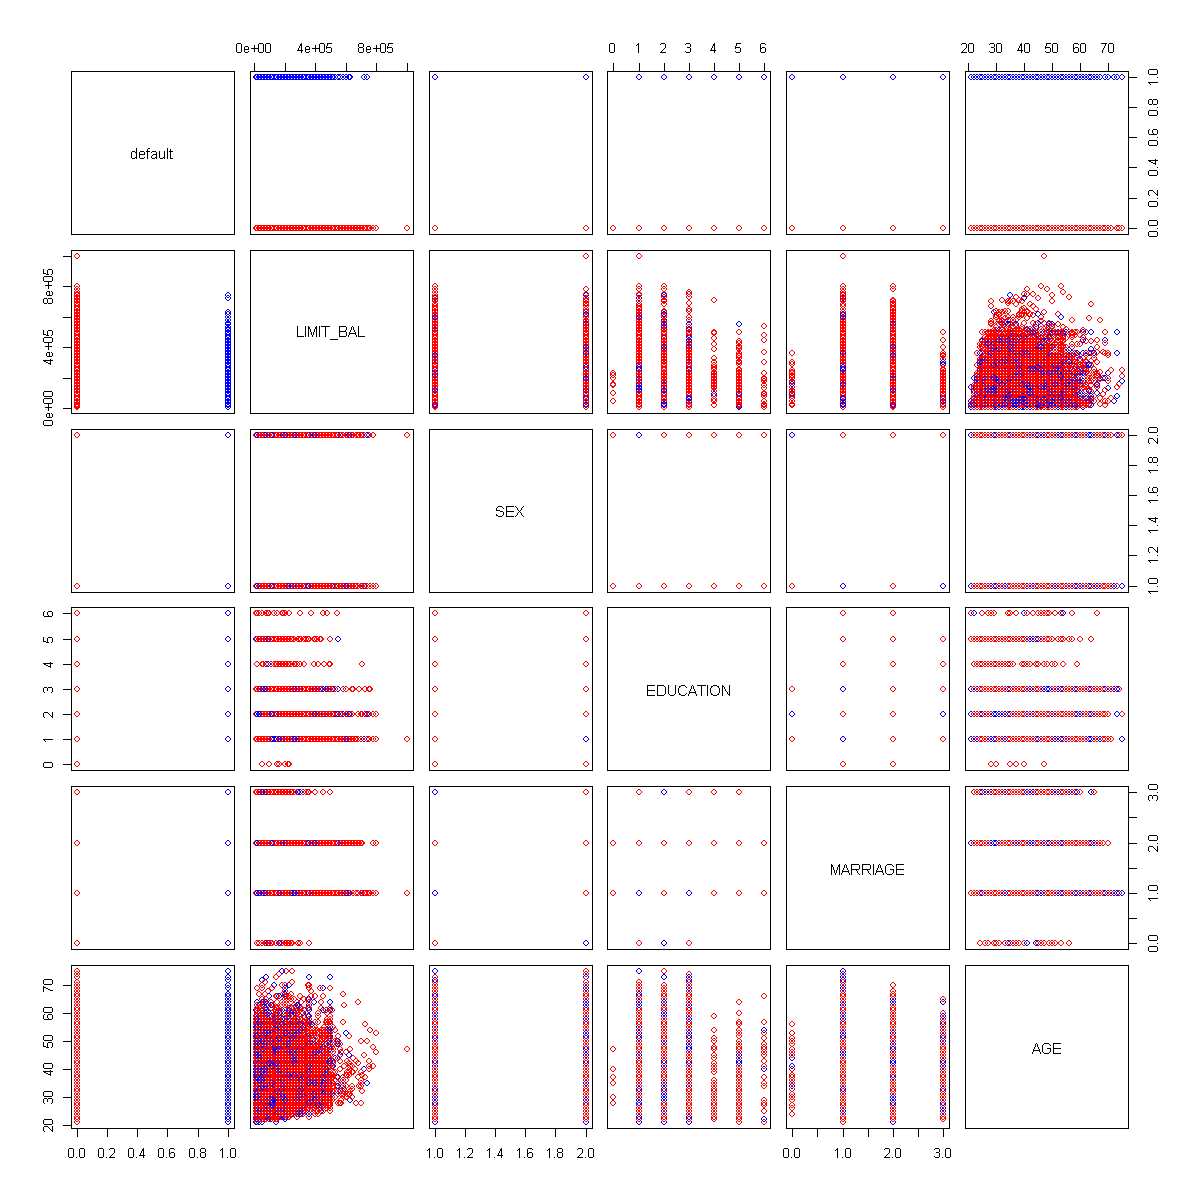

In [80]:
# Pair plot Default VS all rest
options(repr.plot.width=10, repr.plot.height=10)
cols <- rep('blue', nrow(DF))  # no default
cols[DF$default == 0] <- 'red'  # Default
D.VS.R<-pairs(default ~ LIMIT_BAL + SEX + 
                 EDUCATION + MARRIAGE  + AGE  , data=DF, col=cols)
D.VS.R

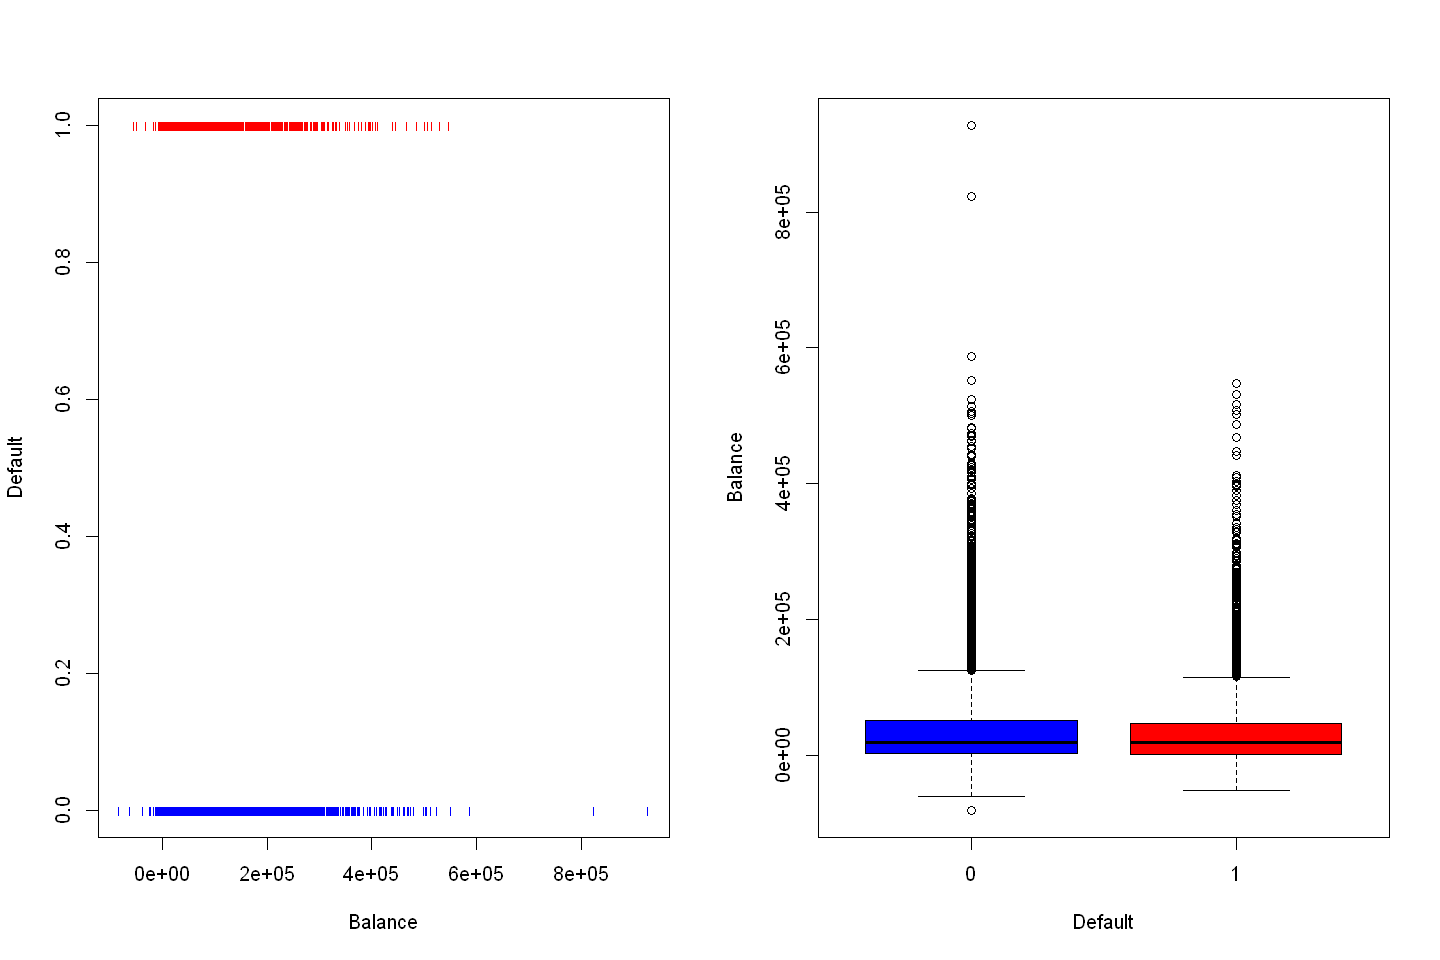

In [96]:
# Relationship between balance and default
options(repr.plot.width=12, repr.plot.height=8)
cols <- rep('blue', nrow(DF))  # Not default
cols[DF$default == 1] <- 'red'  # Default

par(mfrow=c(1, 2))

plot(x=DF$LIMIT_BAL, y=DF$default,  # Plot the data
     xlab='Balance', ylab='Default',
     pch='|', cex=0.5, col=cols)

boxplot(LIMIT_BAL ~ default, data=DF,
        col=c('blue', 'red'),
        xlab='Default', ylab='Balance')

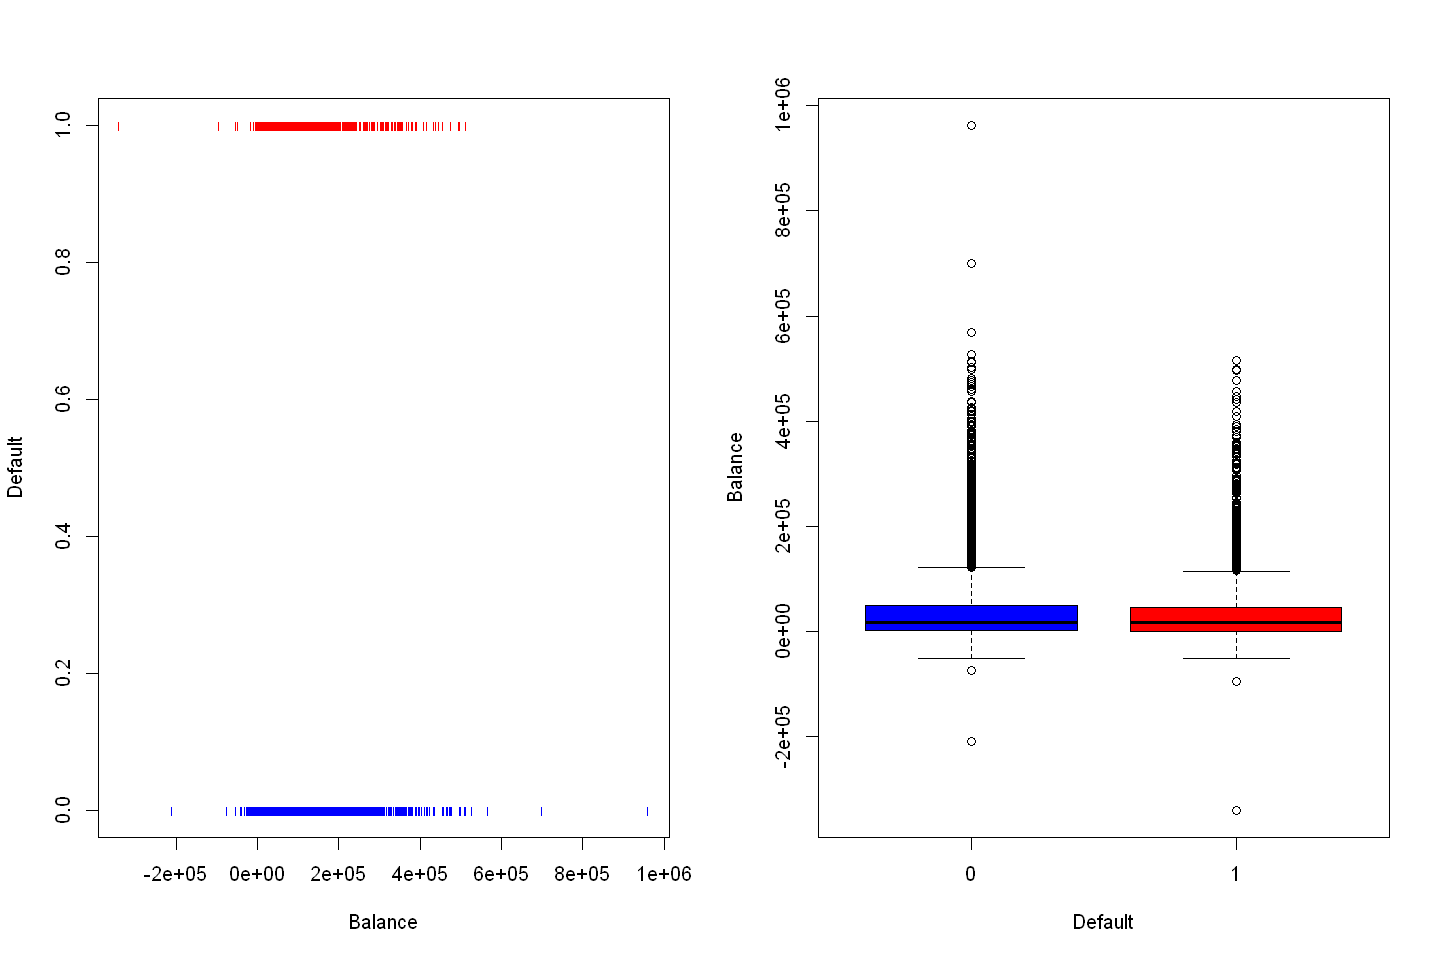

In [107]:
# Relationship between balance and default
options(repr.plot.width=12, repr.plot.height=8)
cols <- rep('blue', nrow(DF))  # Not default
cols[DF$default == 1] <- 'red'  # Default

par(mfrow=c(1, 2))

plot(x=DF$BILL_AMT6, y=DF$default,  # Plot the data
     xlab='Balance', ylab='Default',
     pch='|', cex=0.5, col=cols)

boxplot(BILL_AMT6 ~ default, data=DF,
        col=c('blue', 'red'),
        xlab='Default', ylab='Balance')

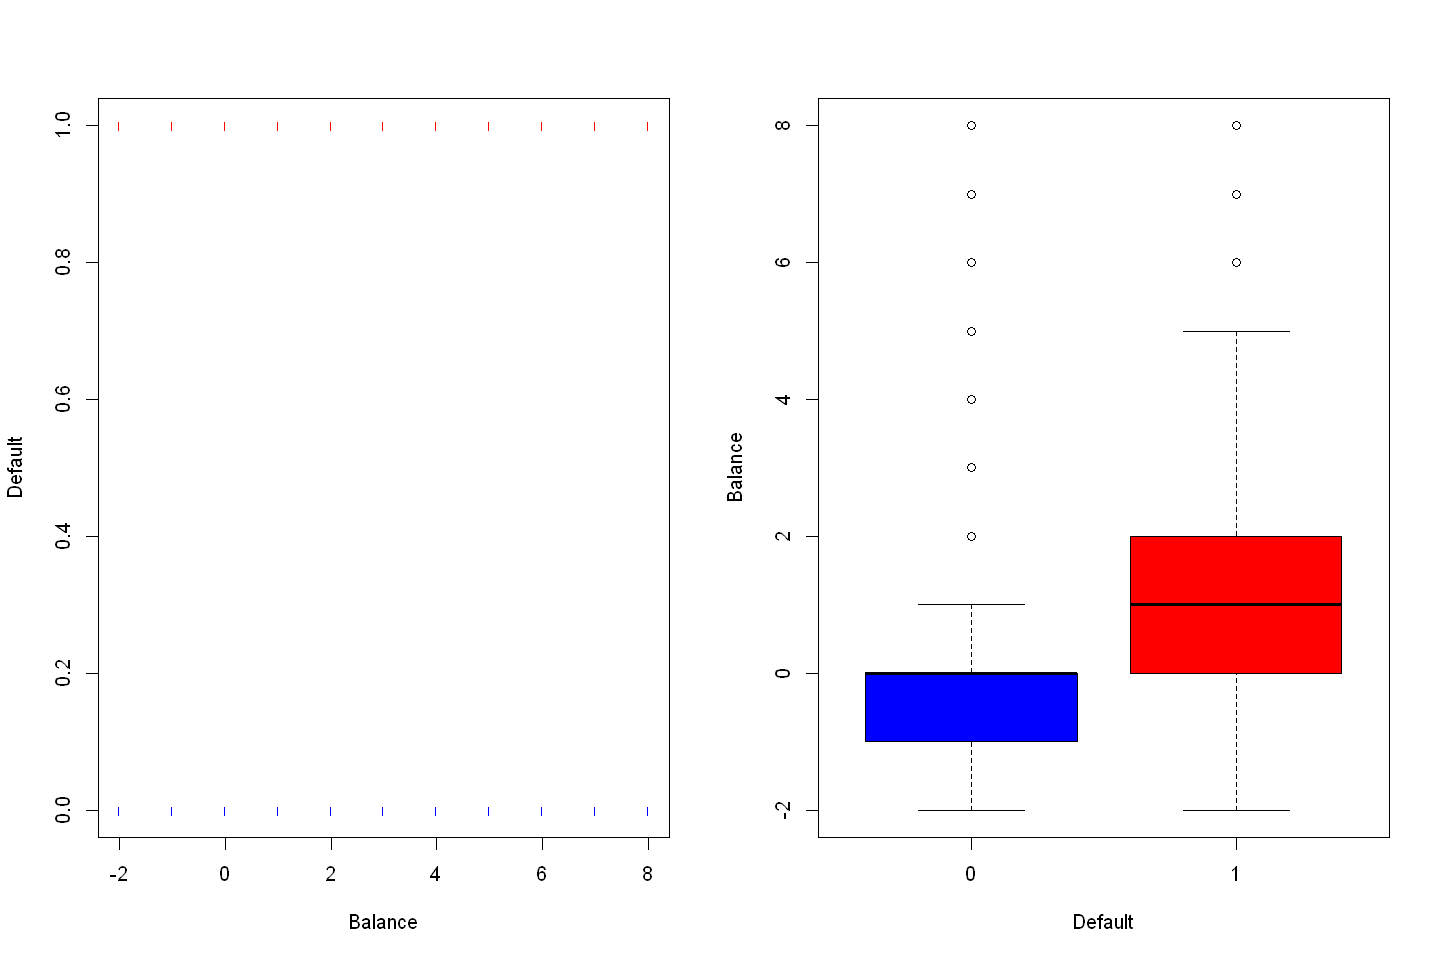

In [100]:
# Relationship between balance and default
options(repr.plot.width=12, repr.plot.height=8)
cols <- rep('blue', nrow(DF))  # Not default
cols[DF$default == 1] <- 'red'  # Default

par(mfrow=c(1, 2))

plot(x=DF$PAY_0, y=DF$default,  # Plot the data
     xlab='Balance', ylab='Default',
     pch='|', cex=0.5, col=cols)

boxplot(PAY_0 ~ default, data=DF,
        col=c('blue', 'red'),
        xlab='Default', ylab='Balance')

In [114]:
set.seed(613)
#seting the row indexes
index <- sample(1:nrow(DF), round(0.3 * nrow(DF), 0))
#spliting data based on the index
train <- DF[index, ]
test <- DF[-index, ]
#Selecting independent columns
selected_columns<-c(names(DF%>%select(-default)))


## Application of Models

### 1. Feature Selection

#### 1.1 exhaustive

In [175]:
# applying the exhaustive feature selection to data
regfit.full=regsubsets(default~.,data=DF)
# summary of exhaustive featur selection
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(default ~ ., data = DF)
23 Variables  (and intercept)
          Forced in Forced out
LIMIT_BAL     FALSE      FALSE
SEX           FALSE      FALSE
EDUCATION     FALSE      FALSE
MARRIAGE      FALSE      FALSE
AGE           FALSE      FALSE
PAY_0         FALSE      FALSE
PAY_2         FALSE      FALSE
PAY_3         FALSE      FALSE
PAY_4         FALSE      FALSE
PAY_5         FALSE      FALSE
PAY_6         FALSE      FALSE
BILL_AMT1     FALSE      FALSE
BILL_AMT2     FALSE      FALSE
BILL_AMT3     FALSE      FALSE
BILL_AMT4     FALSE      FALSE
BILL_AMT5     FALSE      FALSE
BILL_AMT6     FALSE      FALSE
PAY_AMT1      FALSE      FALSE
PAY_AMT2      FALSE      FALSE
PAY_AMT3      FALSE      FALSE
PAY_AMT4      FALSE      FALSE
PAY_AMT5      FALSE      FALSE
PAY_AMT6      FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5
1  ( 1 ) " "  

In [178]:
# applying the forward feature selection to data
regfit.fwd=regsubsets(default~.,data=DF,method='forward',nvmax=23)
# summary of forward featur selection
reg.summary.fwd=summary(regfit.fwd)

In [179]:
# coeficient names for forward feature selection
names(reg.summary.fwd)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [180]:
#summary of RSQ for forward feature selection
reg.summary.fwd$rsq

[1] 0.09770887 0.10394526 0.10907979 0.11085803 0.11176185 0.11260396
 [7] 0.11324377 0.11386685 0.11428225 0.11476813 0.11508008 0.11536368
[13] 0.11555269 0.11569480 0.11583551 0.11589883 0.11594010 0.11595651
[19] 0.11599432 0.11604918 0.11607584 0.11607682 0.11607689

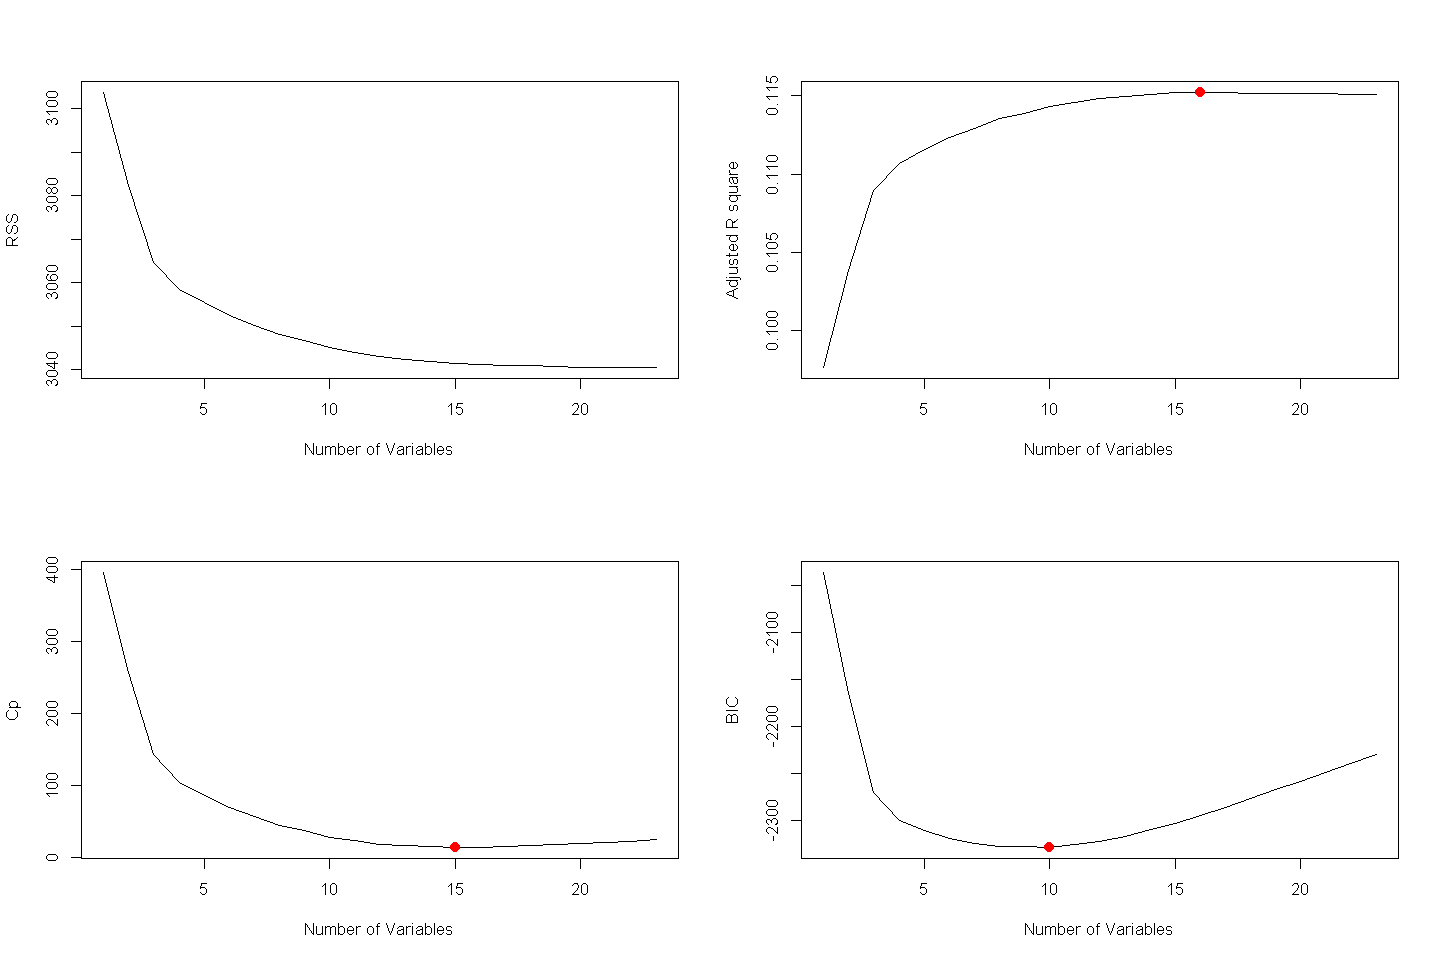

In [181]:
#plot 4 diferent coeficient to show the best number of the features in diferent coeficients
#paring axies to 4 cells
par(mfrow=c(2,2))
#plot the RSS
plot(reg.summary.fwd$rss,xlab='Number of Variables',ylab='RSS',type='l')
# Plot the adjusted rate 2 
plot(reg.summary.fwd$adjr2,xlab='Number of Variables',ylab='Adjusted R square',type='l')
# define the optimum point of adjusted rate 2
points(which.max(reg.summary.fwd$adjr2),reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)],col='red',cex=2,pch=20)
#plot the cp
plot(reg.summary.fwd$cp,xlab="Number of Variables",ylab="Cp",type='l')
# define the optimum point of cp
points(which.min(reg.summary.fwd$cp),reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)],col="red",cex=2,pch=20)
# plot the Bic 
plot(reg.summary.fwd$bic,xlab="Number of Variables",ylab="BIC",type='l')
# define the optimum point of bic
points(which.min(reg.summary.fwd$bic),reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)],col="red",cex=2,pch=20)

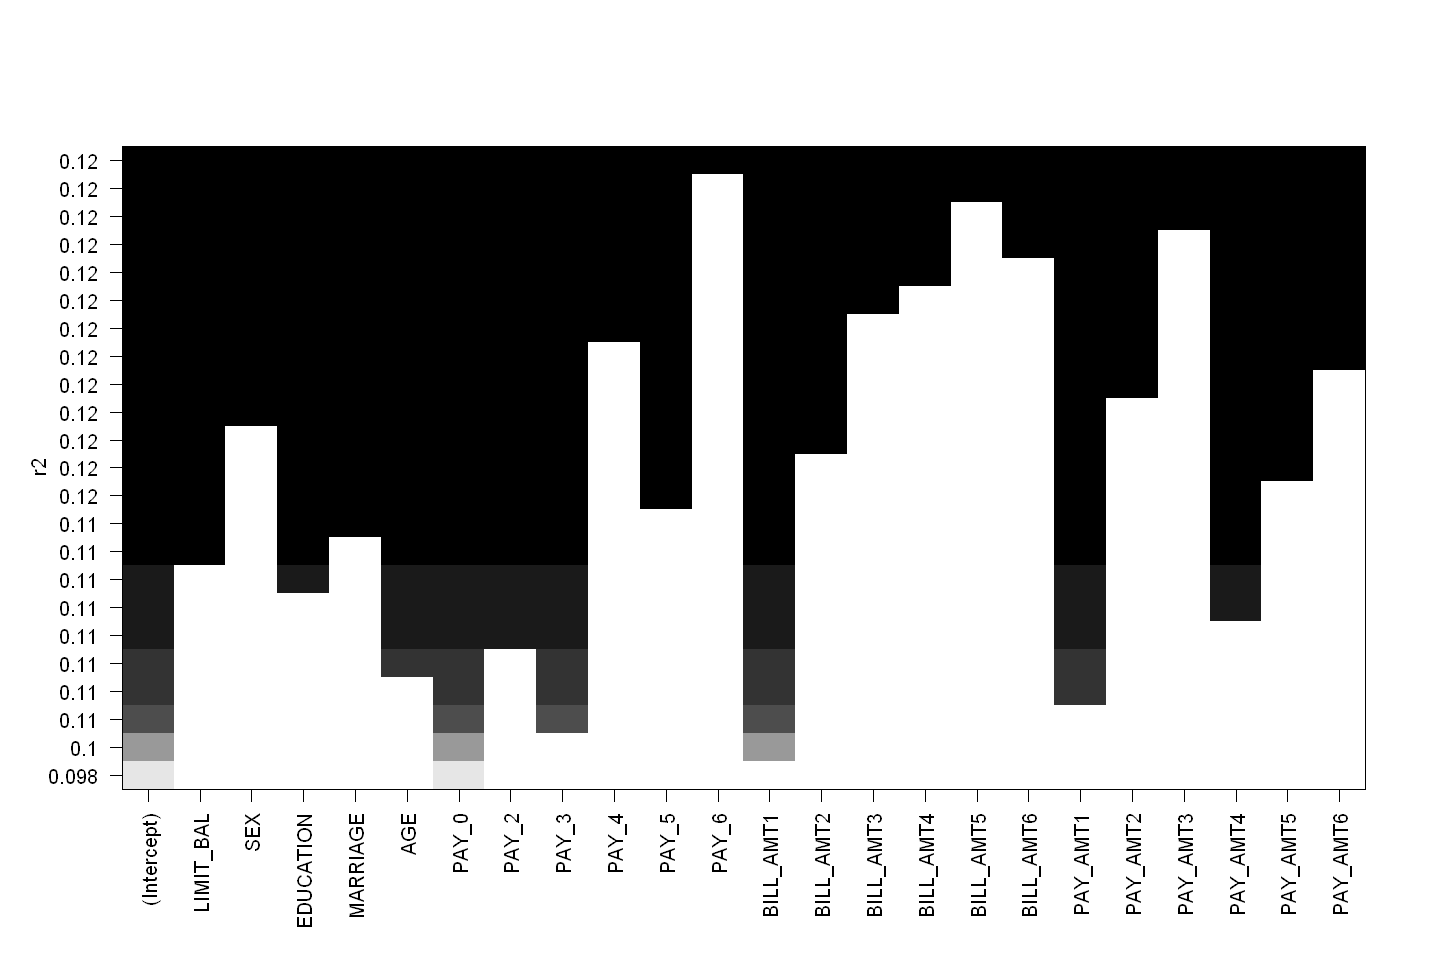

In [182]:
# ploting the R square of forward model
plot(regfit.fwd,scale="r2")

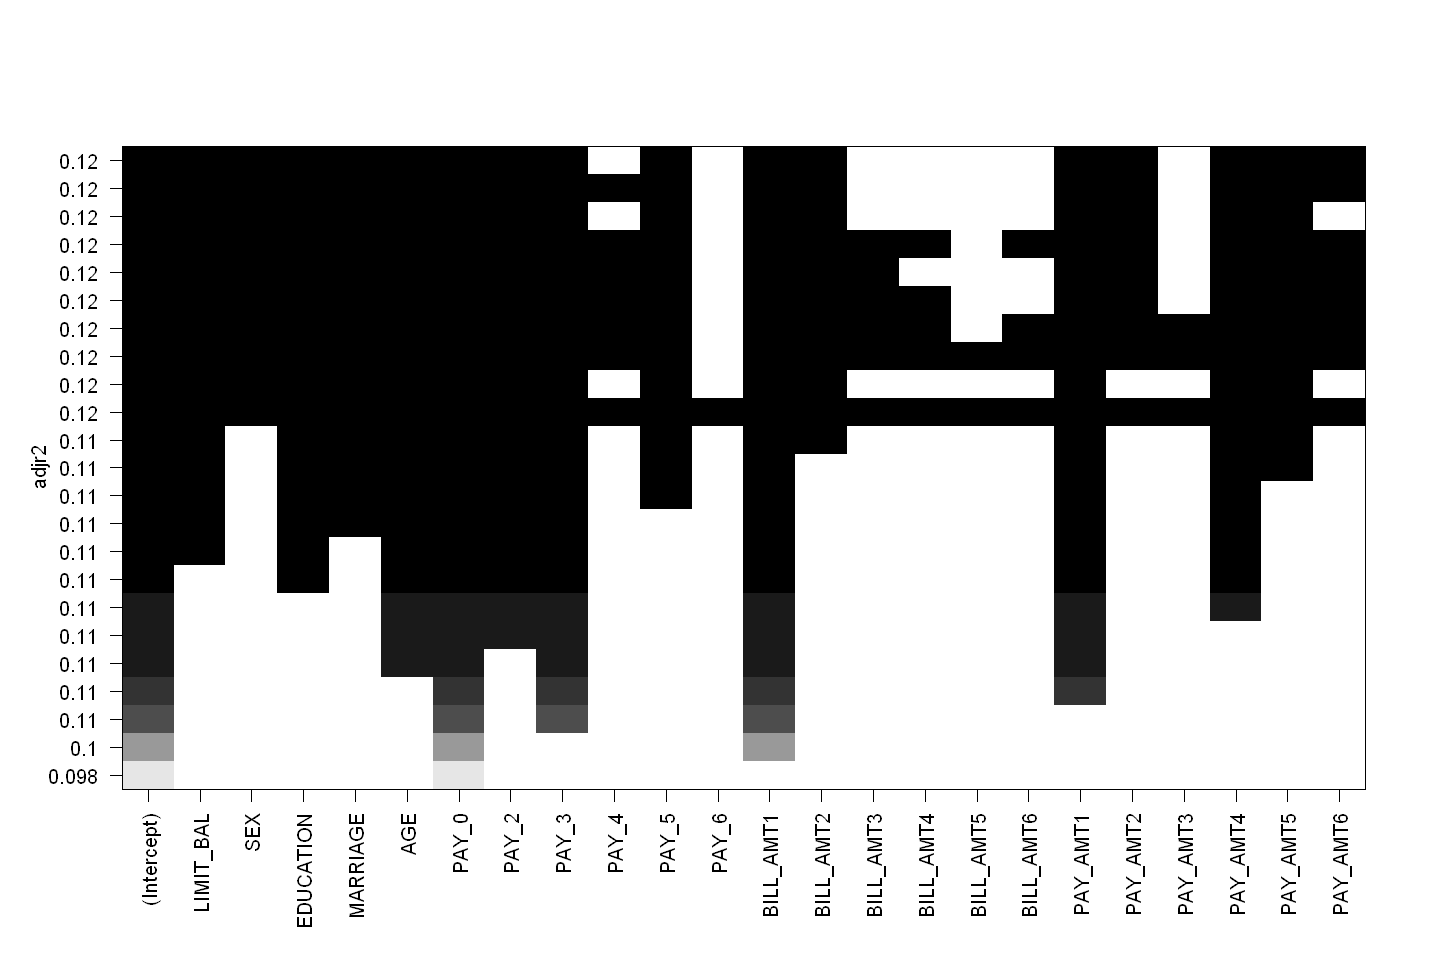

In [183]:
# ploting the adjusted rate 2 of forward model
plot(regfit.fwd,scale="adjr2")

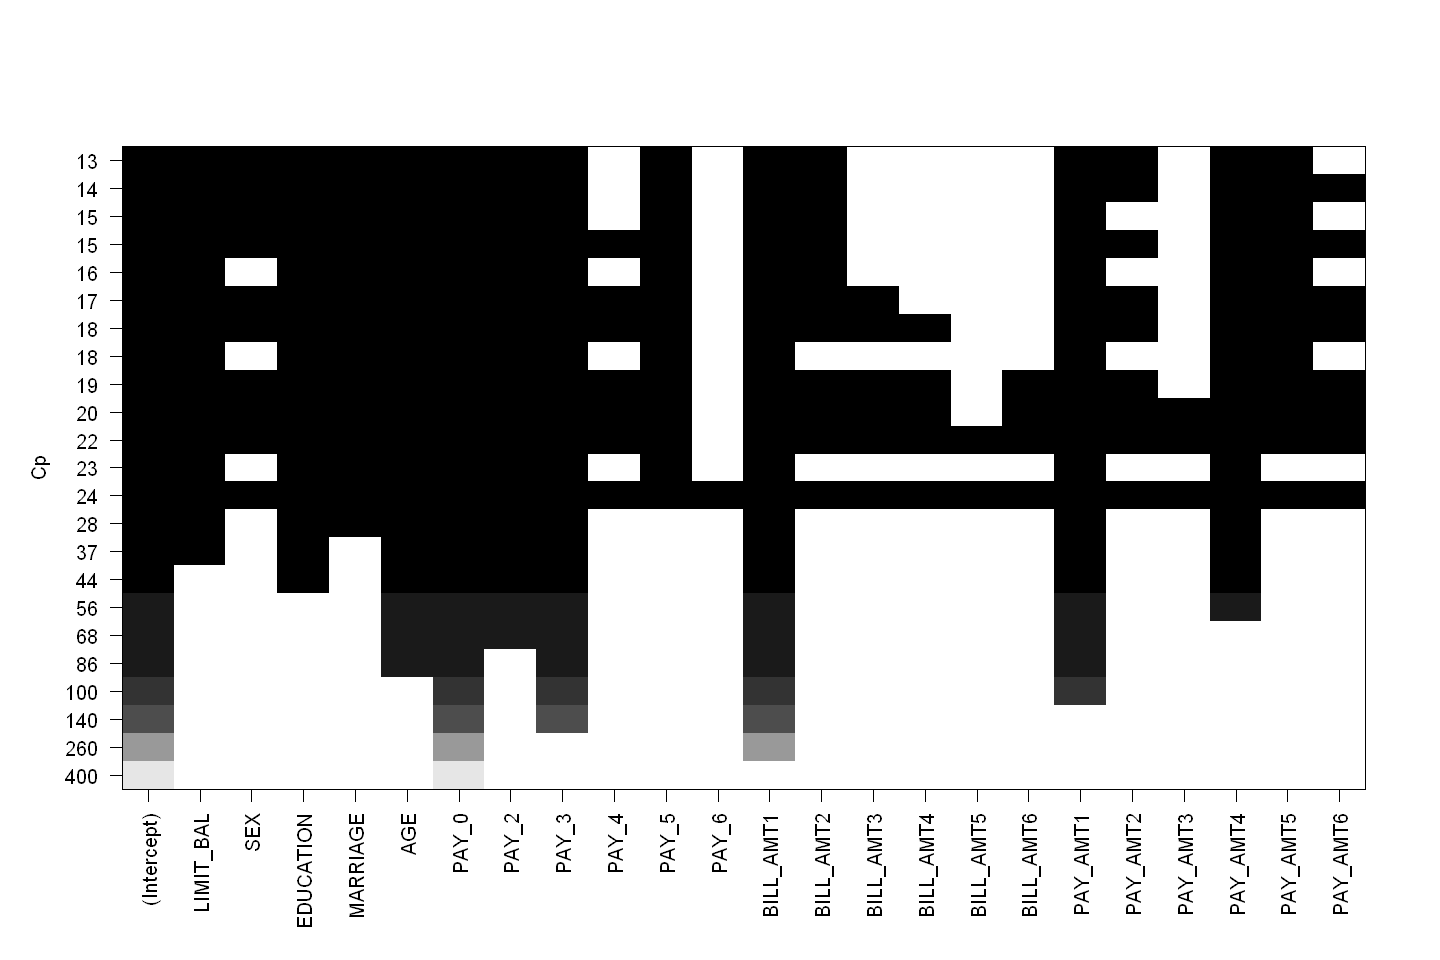

In [184]:
# ploting the CP of forward model
plot(regfit.fwd,scale="Cp")

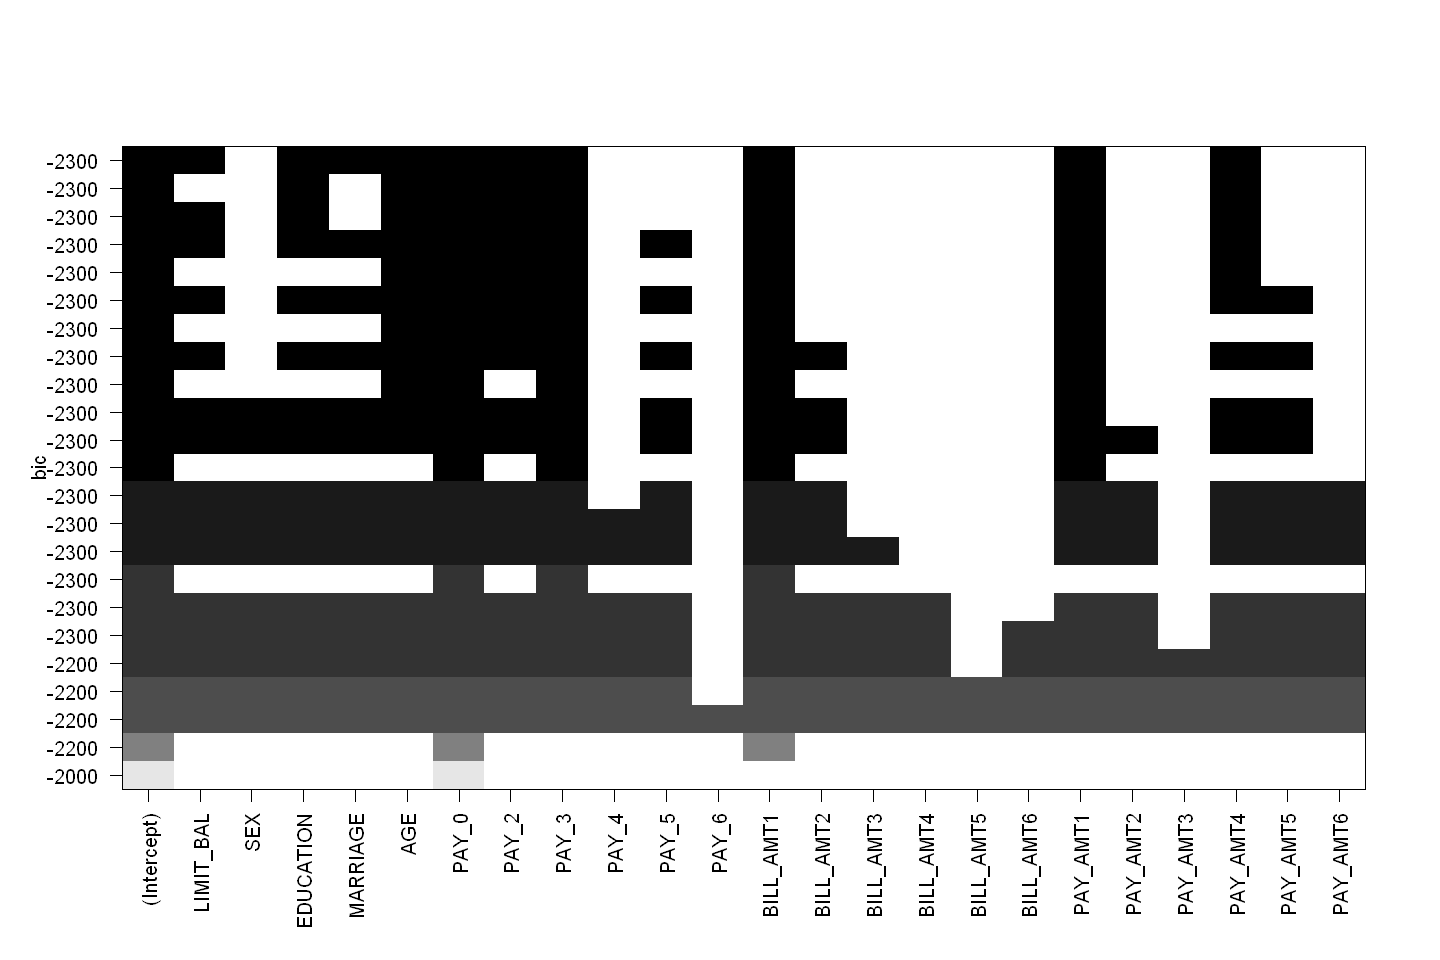

In [185]:
# ploting the bicof forward model
plot(regfit.fwd,scale="bic")

In [201]:
#storing the feature selected based on the forward model by cp coeficient
selection.fwd.cp=names(coef(regfit.fwd,which.min(reg.summary.fwd$cp)))[-1]
#displaying the coeficient and variables name for forward feature selection for CP
coef(regfit.fwd,which.min(reg.summary.fwd$cp))

(Intercept)     LIMIT_BAL           SEX     EDUCATION      MARRIAGE 
 3.078617e-01 -6.882102e-08 -1.026951e-02 -1.688989e-02 -2.004771e-02 
          AGE         PAY_0         PAY_2         PAY_3         PAY_5 
 1.259951e-03  9.333216e-02  1.564589e-02  1.579873e-02  9.326595e-03 
    BILL_AMT1     BILL_AMT2      PAY_AMT1      PAY_AMT2      PAY_AMT4 
-6.699343e-07  2.777420e-07 -1.074043e-06 -2.349611e-07 -5.502095e-07 
     PAY_AMT5 
-4.208516e-07

In [202]:
#storing the feature selected based on the forward model by bic coeficient
selection.fwd.bic=names(coef(regfit.fwd,which.min(reg.summary.fwd$bic)))[-1]
#displaying the coeficient and variables name for forward feature selection for bic
coef(regfit.fwd,which.min(reg.summary.fwd$bic))

(Intercept)     LIMIT_BAL     EDUCATION      MARRIAGE           AGE 
 2.875328e-01 -8.594149e-08 -1.719816e-02 -1.939385e-02  1.325109e-03 
        PAY_0         PAY_2         PAY_3     BILL_AMT1      PAY_AMT1 
 9.505642e-02  1.667687e-02  2.105220e-02 -4.245931e-07 -9.575470e-07 
     PAY_AMT4 
-6.529586e-07

#### 1.2 backward feature selection

In [191]:
# applying the backward feature selection to data
regfit.bwd=regsubsets(default~.,data=DF,method='backward')
# summary of backward featur selection
reg.summary.bwd=summary(regfit.bwd)

In [192]:
# coeficient names for backward feature selection
names(reg.summary.bwd)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [193]:
#summary of RSQ for backward feature selection
reg.summary.bwd$rsq

[1] 0.09770887 0.10394526 0.10907979 0.11085803 0.11176185 0.11260396 0.11324377
[8] 0.11386685

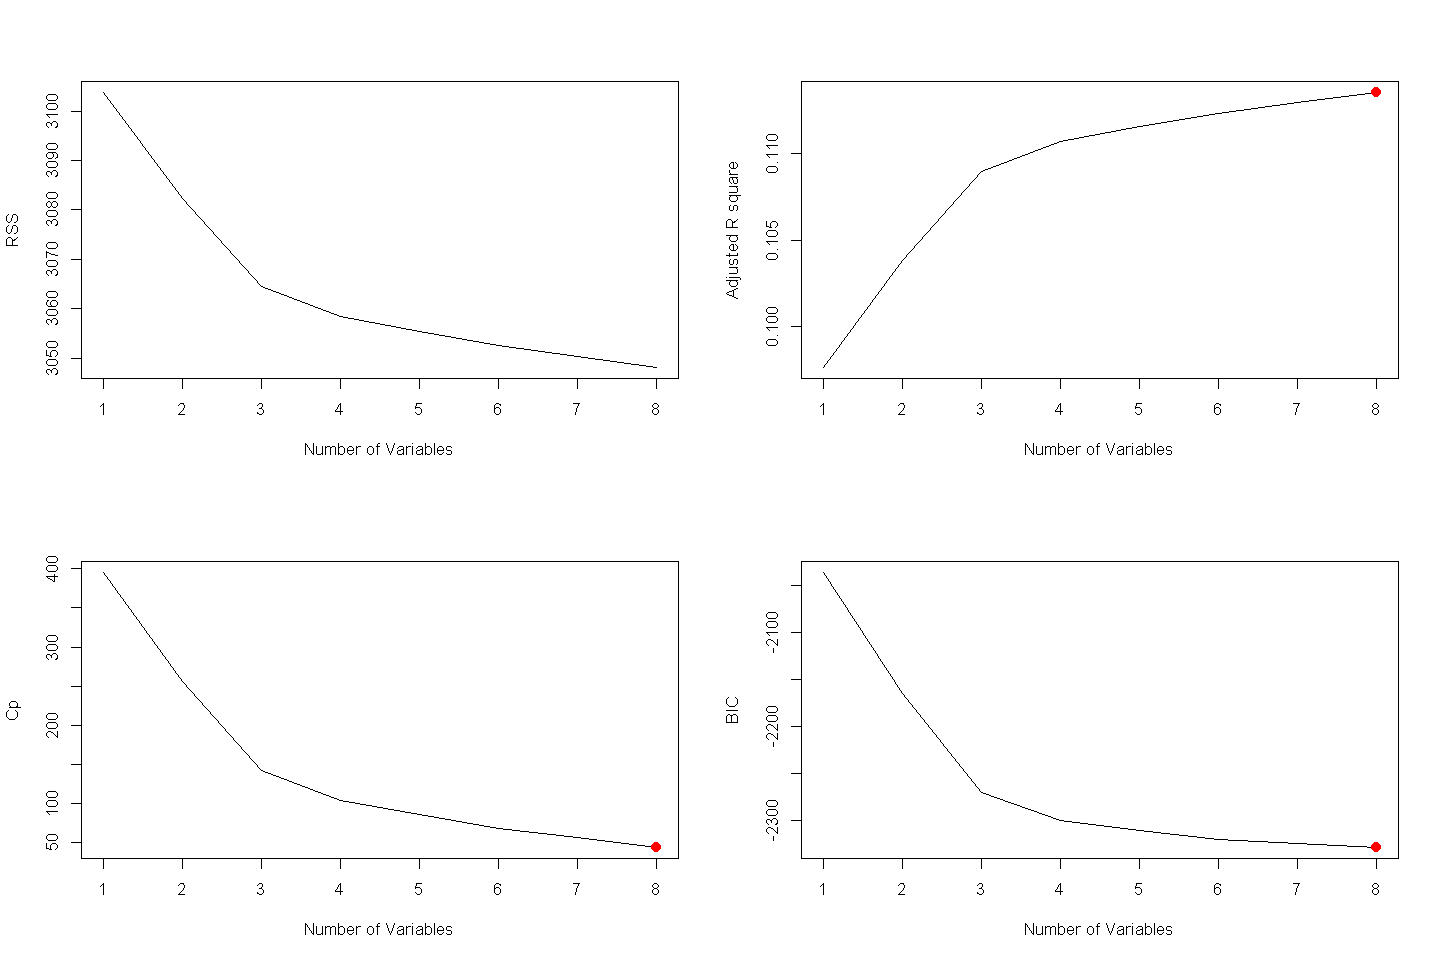

In [194]:
#plot 4 diferent coeficient to show the best number of the features in diferent coeficients
#paring axies to 4 cells
par(mfrow=c(2,2))
#plot the RSS
plot(reg.summary.bwd$rss,xlab='Number of Variables',ylab='RSS',type='l')
# Plot the adjusted rate 2 
plot(reg.summary.bwd$adjr2,xlab='Number of Variables',ylab='Adjusted R square',type='l')
# define the optimum point of adjusted rate 2
points(which.max(reg.summary.bwd$adjr2),reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)],col='red',cex=2,pch=20)
#plot the cp
plot(reg.summary.bwd$cp,xlab="Number of Variables",ylab="Cp",type='l')
# define the optimum point of cp
points(which.min(reg.summary.bwd$cp),reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)],col="red",cex=2,pch=20)
# plot the Bic 
plot(reg.summary.bwd$bic,xlab="Number of Variables",ylab="BIC",type='l')
# define the optimum point of bic
points(which.min(reg.summary.bwd$bic),reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)],col="red",cex=2,pch=20)

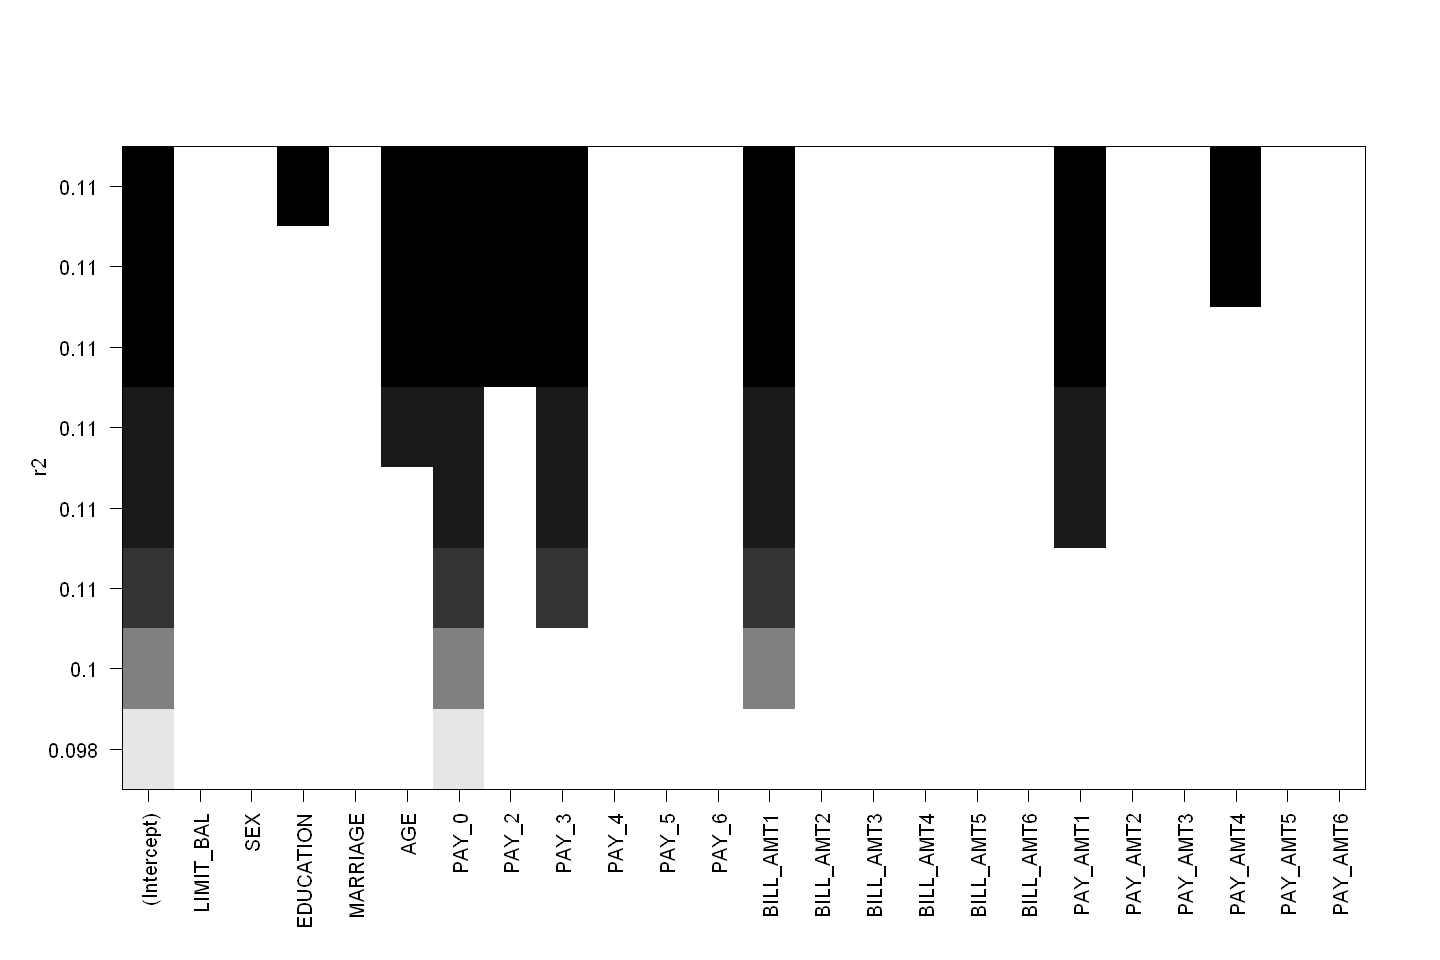

In [195]:
# ploting the R square of backward model
plot(regfit.bwd,scale="r2")

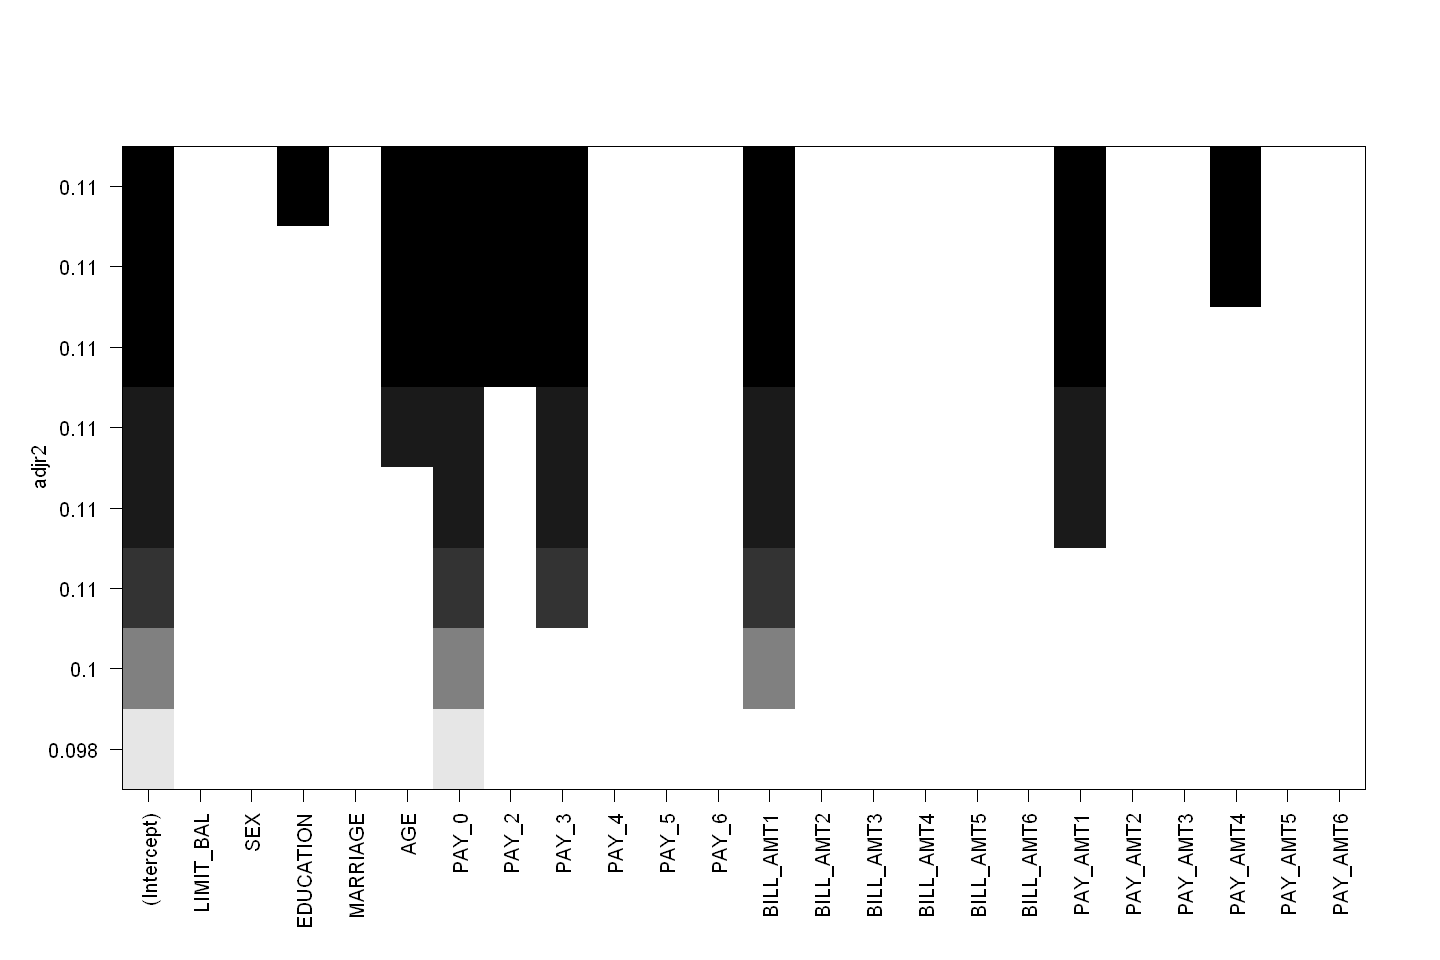

In [196]:
# ploting the adjusted rate 2 of backward model
plot(regfit.bwd,scale="adjr2")

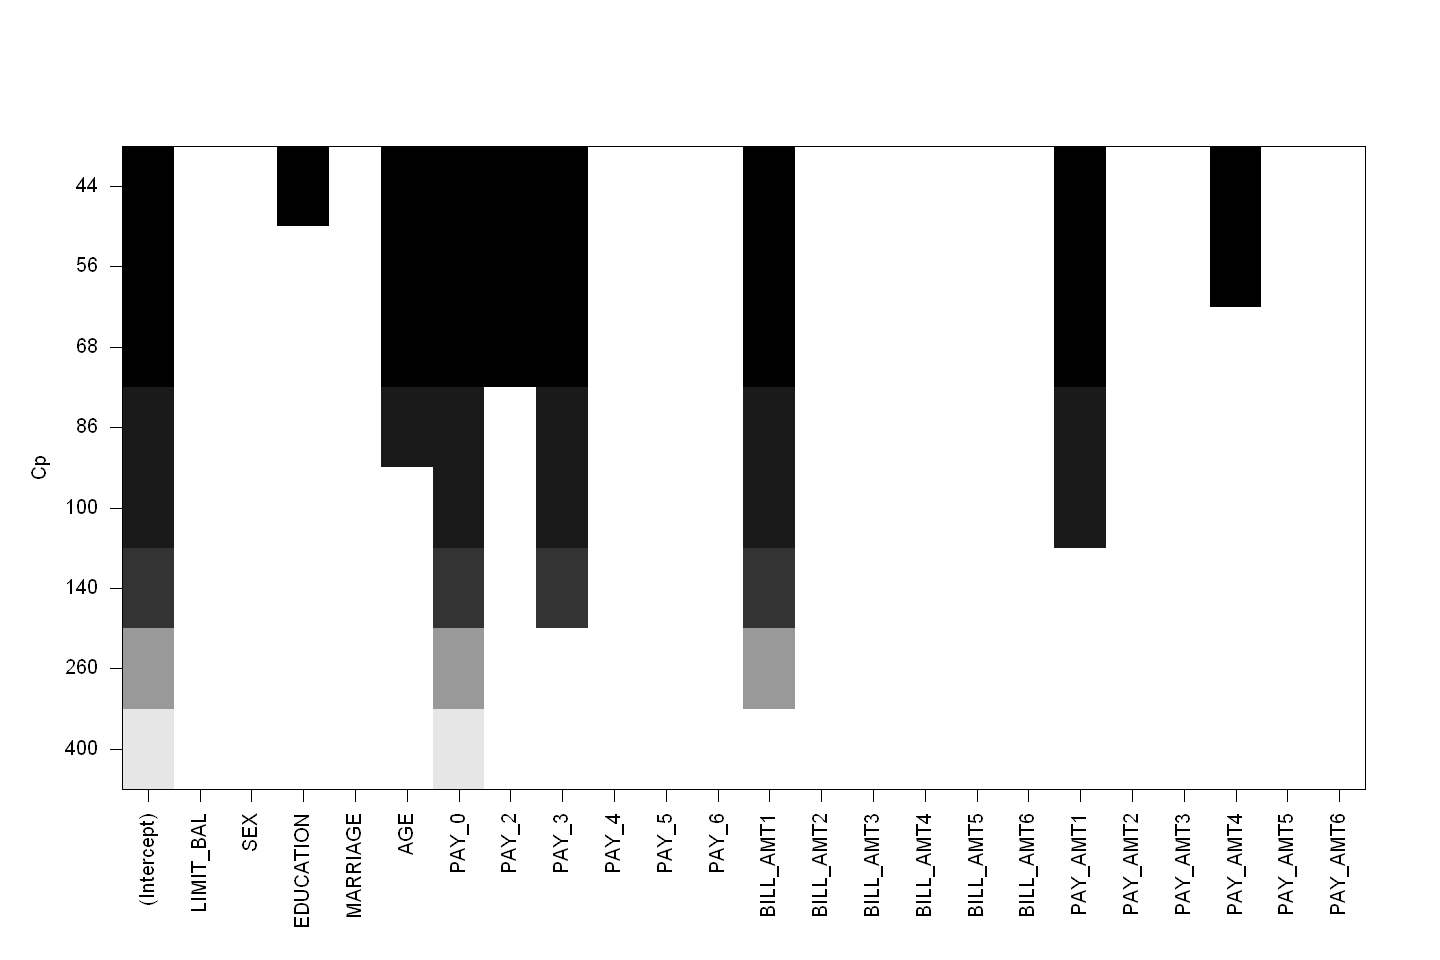

In [197]:
# ploting the CP of backward model
plot(regfit.bwd,scale="Cp")

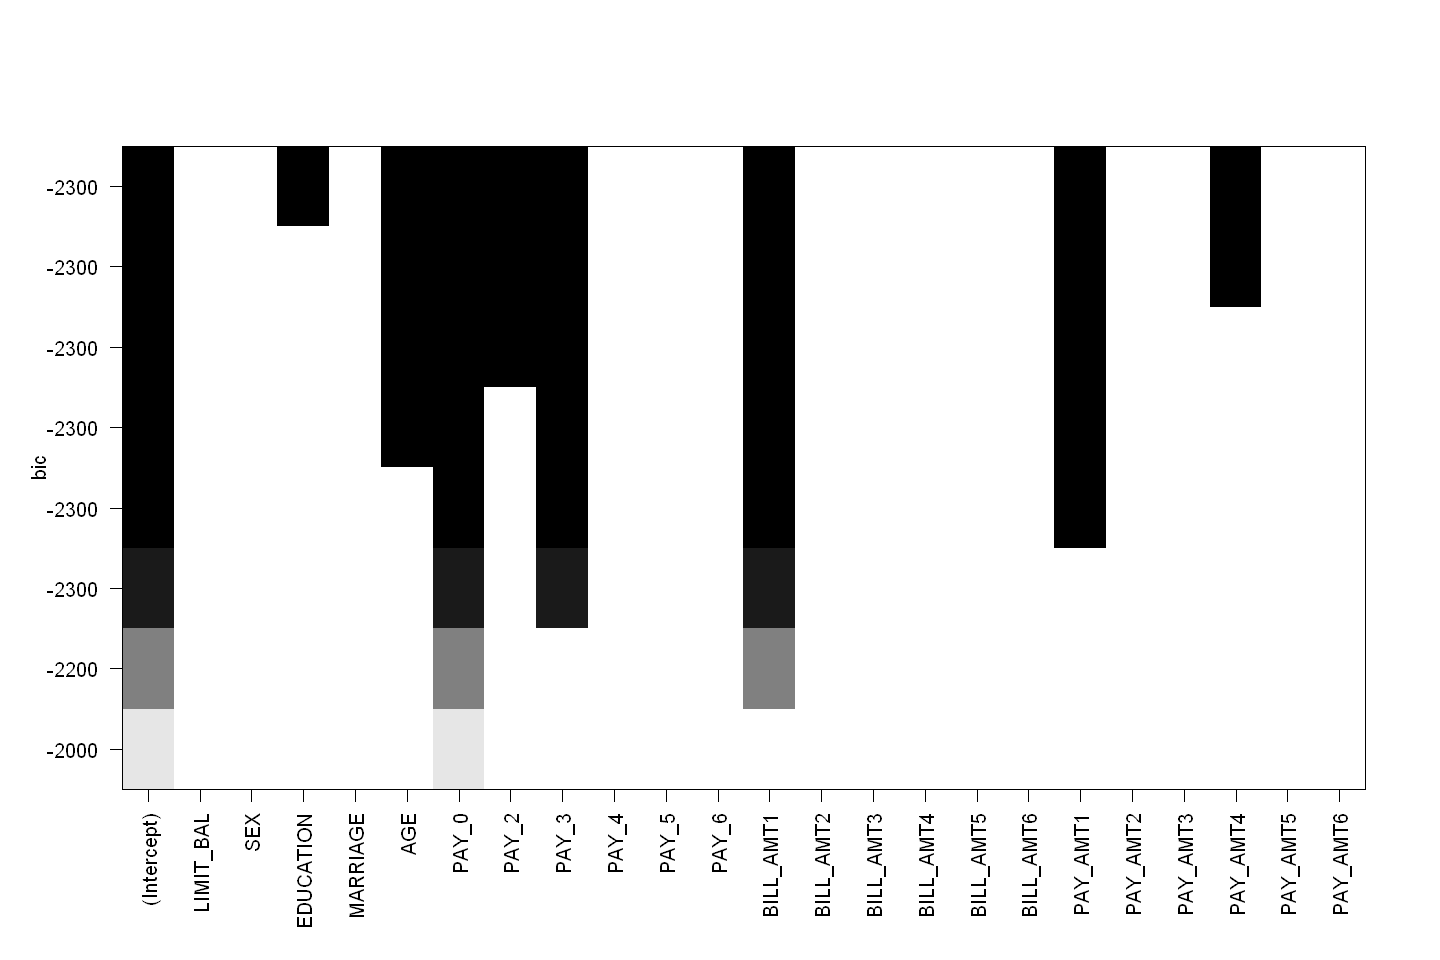

In [198]:
# ploting the bicof backward model
plot(regfit.bwd,scale="bic")

In [203]:
#storing the feature selected based on the backward model by cp coeficient
selection.bwd.cp=names(coef(regfit.bwd,which.min(reg.summary.bwd$cp)))[-1]
#displaying the coeficient and variables name for backward feature selection for CP
coef(regfit.bwd,which.min(reg.summary.bwd$cp))

(Intercept)     EDUCATION           AGE         PAY_0         PAY_2 
 2.300895e-01 -1.352785e-02  1.601575e-03  9.613131e-02  1.804993e-02 
        PAY_3     BILL_AMT1      PAY_AMT1      PAY_AMT4 
 2.219220e-02 -4.749819e-07 -1.039974e-06 -7.179180e-07

In [204]:
#storing the feature selected based on the backward model by bic coeficient
selection.bwd.bic=names(coef(regfit.bwd,which.min(reg.summary.bwd$bic)))[-1]
#displaying the coeficient and variables name for backward feature selection for bic
coef(regfit.bwd,which.min(reg.summary.bwd$bic))

(Intercept)     EDUCATION           AGE         PAY_0         PAY_2 
 2.300895e-01 -1.352785e-02  1.601575e-03  9.613131e-02  1.804993e-02 
        PAY_3     BILL_AMT1      PAY_AMT1      PAY_AMT4 
 2.219220e-02 -4.749819e-07 -1.039974e-06 -7.179180e-07

#### 1.3. Choosing among model using validation set

In [206]:
#train and test split
set.seed(613)
#tain Data
train=sample(c(TRUE,FALSE), nrow(DF),rep=TRUE)
# Test Data
test=(!train)

In [208]:
# applyin model on test set
regfit.best=regsubsets(default~.,data=DF[train,],nvmax=23)

In [209]:
# Making model matrix based on the test set
test.mat=model.matrix(default~.,data=DF[test,])

In [214]:
# setting val errors based on the number of variables
val.errors=rep(NA,23)
#using for loop to obtain the coeficiant for each variable
for(i in 1:23){
   coefi=coef(regfit.best,id=i)
   pred=test.mat[,names(coefi)]%*%coefi
   val.errors[i]=mean((DF$default[test]-pred)^2)
}

In [215]:
#see the  error of each variable
val.errors

[1] 0.1536918 0.1529134 0.1524068 0.1522857 0.1520217 0.1519820 0.1519896
 [8] 0.1517196 0.1516774 0.1518770 0.1517790 0.1513697 0.1515554 0.1514508
[15] 0.1514293 0.1514244 0.1515926 0.1516184 0.1516405 0.1516256 0.1516369
[22] 0.1516378 0.1516350

In [216]:
# get the number which have minimum error
which.min(val.errors)

[1] 12

In [217]:
# get the coeficient of minimum error
coef(regfit.best,12)

(Intercept)     LIMIT_BAL     EDUCATION      MARRIAGE           AGE 
 3.074769e-01 -8.872217e-08 -1.975674e-02 -1.743840e-02  1.110627e-03 
        PAY_0         PAY_2         PAY_3         PAY_5     BILL_AMT1 
 9.411721e-02  2.291136e-02  1.171371e-02  1.233061e-02 -4.593631e-07 
     PAY_AMT1      PAY_AMT4      PAY_AMT5 
-8.749084e-07 -7.631369e-07 -5.796832e-07

In [222]:
# define function for prediction  
predict.regsubsets=function(object,newdata,id,...){
  form=as.formula(object$call[[2]])
  mat=model.matrix(form,newdata)
  coefi=coef(object,id=id)
  xvars=names(coefi)
  mat[,xvars]%*%coefi
  }

In [223]:
# apply the best result on whole data set
regfit.best=regsubsets(default~.,data=DF,nvmax=23)
coef(regfit.best,12)

(Intercept)     LIMIT_BAL     EDUCATION      MARRIAGE           AGE 
 2.883117e-01 -7.331731e-08 -1.725501e-02 -1.934557e-02  1.339708e-03 
        PAY_0         PAY_2         PAY_3         PAY_5     BILL_AMT1 
 9.383200e-02  1.550585e-02  1.691816e-02  9.134616e-03 -4.240371e-07 
     PAY_AMT1      PAY_AMT4      PAY_AMT5 
-9.300157e-07 -5.857066e-07 -4.776548e-07

In [228]:
# Cross validation for choosing among models
k=12
set.seed(613)
folds=sample(1:k,nrow(DF),replace=TRUE)
cv.errors=matrix(NA,k,23, dimnames=list(NULL, paste(1:23)))

In [230]:
# get the test error for each model size
for(j in 1:k){
  best.fit=regsubsets(default~.,data=DF[folds!=j,],nvmax=23)
  for(i in 1:23){
    pred=predict(best.fit,DF[folds==j,],id=i)
    cv.errors[j,i]=mean( (DF$default[folds==j]-pred)^2)
    }
  }

In [231]:
# mean of error of each model
mean.cv.errors=apply(cv.errors,2,mean)
mean.cv.errors

1         2         3         4         5         6         7         8 
0.1551742 0.1541101 0.1534440 0.1529772 0.1531687 0.1530721 0.1529953 0.1528355 
        9        10        11        12        13        14        15        16 
0.1528329 0.1526777 0.1525946 0.1525581 0.1525199 0.1524725 0.1524466 0.1524486 
       17        18        19        20        21        22        23 
0.1524724 0.1524797 0.1524807 0.1524538 0.1524269 0.1524527 0.1524574

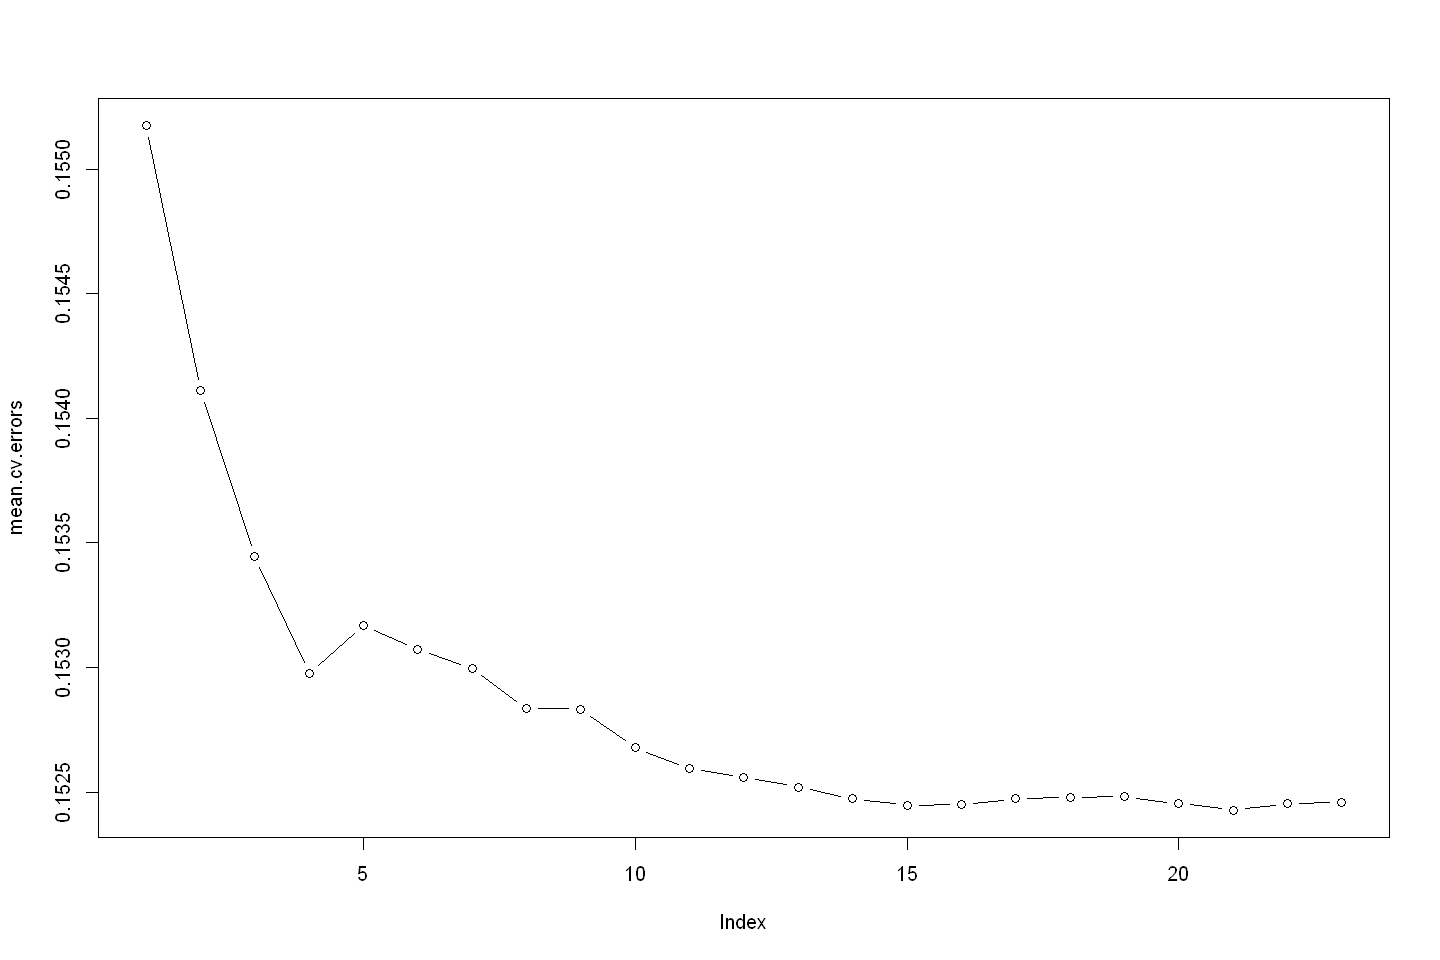

In [232]:
#ploting the results on mean errors 
par(mfrow=c(1,1))
plot(mean.cv.errors,type='b')

In [236]:
# fitting model and get the coeficiant for the optimum number of variables
reg.best=regsubsets(default~.,data=DF, nvmax=23)
#storing the feature selected based on the backward model by bic coeficient
selection.best=names(coef(reg.best,12))[-1]
# results for best variables
coef(reg.best,12)

(Intercept)     LIMIT_BAL     EDUCATION      MARRIAGE           AGE 
 2.883117e-01 -7.331731e-08 -1.725501e-02 -1.934557e-02  1.339708e-03 
        PAY_0         PAY_2         PAY_3         PAY_5     BILL_AMT1 
 9.383200e-02  1.550585e-02  1.691816e-02  9.134616e-03 -4.240371e-07 
     PAY_AMT1      PAY_AMT4      PAY_AMT5 
-9.300157e-07 -5.857066e-07 -4.776548e-07

#### 1.3. Ridge Regression

In [240]:
#define independant variables and dependant variable
# independants
x=model.matrix(default~.,DF)[,-1]
# dependant
y=DF$default

In [241]:
#fdefining range for the lambda
grid=10^seq(10,-2,length=100)
#applying ridge regression
ridge.mod=glmnet(x,y,alpha=0,lambda=grid)

In [242]:
#dimention of model
dim(coef(ridge.mod))

[1]  24 100

In [243]:
# labmbda for row number 63
ridge.mod$lambda[63]
# coeficients of lambda
coef(ridge.mod)[,63]
#sum square of lambda
sqrt(sum(coef(ridge.mod)[-1,63]^2))

[1] 305.3856

(Intercept)     LIMIT_BAL           SEX     EDUCATION      MARRIAGE 
 2.210553e-01 -6.306776e-10 -4.067025e-05  1.579681e-05 -1.883161e-05 
          AGE         PAY_0         PAY_2         PAY_3         PAY_4 
 4.599006e-07  1.580998e-04  1.184941e-04  1.067917e-04  1.006946e-04 
        PAY_5         PAY_6     BILL_AMT1     BILL_AMT2     BILL_AMT3 
 9.824165e-05  8.821663e-05 -1.536977e-10 -1.059833e-10 -1.136843e-10 
    BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2 
-9.237351e-11 -7.411432e-11 -6.568176e-11 -2.771789e-09 -1.519299e-09 
     PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6 
-1.728542e-09 -2.348320e-09 -2.197825e-09 -1.687565e-09

[1] 0.0002833237

In [244]:
# labmbda for row number 96
ridge.mod$lambda[96]
# coeficients of lambda
coef(ridge.mod)[,96]
#sum square of lambda
sqrt(sum(coef(ridge.mod)[-1,96]^2))

[1] 0.03053856

(Intercept)     LIMIT_BAL           SEX     EDUCATION      MARRIAGE 
 3.068171e-01 -7.101128e-08 -1.017061e-02 -1.522406e-02 -1.887176e-02 
          AGE         PAY_0         PAY_2         PAY_3         PAY_4 
 1.149909e-03  8.306567e-02  1.816250e-02  1.392621e-02  6.257060e-03 
        PAY_5         PAY_6     BILL_AMT1     BILL_AMT2     BILL_AMT3 
 6.700997e-03  1.806805e-03 -3.465022e-07 -2.225203e-08  2.374728e-08 
    BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2 
-1.032680e-07  1.319981e-08  6.033614e-08 -7.906536e-07 -2.536227e-07 
     PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6 
-2.288826e-09 -6.081844e-07 -4.535248e-07 -2.124202e-07

[1] 0.09057439

In [247]:
#predict for l = 63
predict(ridge.mod,s=63,type="coefficients")[1:24,]

(Intercept)     LIMIT_BAL           SEX     EDUCATION      MARRIAGE 
 2.224253e-01 -3.036224e-09 -1.967363e-04  7.362550e-05 -9.406283e-05 
          AGE         PAY_0         PAY_2         PAY_3         PAY_4 
 2.401761e-06  7.662110e-04  5.709087e-04  5.133604e-04  4.831738e-04 
        PAY_5         PAY_6     BILL_AMT1     BILL_AMT2     BILL_AMT3 
 4.711820e-04  4.228689e-04 -7.786943e-10 -5.464351e-10 -5.826812e-10 
    BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2 
-4.827676e-10 -3.945606e-10 -3.520298e-10 -1.345191e-08 -7.348668e-09 
     PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6 
-8.336837e-09 -1.137821e-08 -1.062877e-08 -8.158388e-09

In [248]:
#spliting data to train and test
set.seed(613)
train=sample(1:nrow(x), nrow(x)/3)
test=(-train)
y.test=y[test]

In [249]:
#fiting and evaluating the MSE
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
ridge.pred=predict(ridge.mod,s=4,newx=x[test,])
# MSE of test
mean((ridge.pred-y.test)^2)

[1] 0.1635547

In [250]:
# MSE of test set
mean((mean(y[train])-y.test)^2)

[1] 0.1717081

In [251]:
#fitting ridge by large number of lambda
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])
# MSE result
mean((ridge.pred-y.test)^2)

[1] 0.1717081

In [253]:
#predictng by new mdel
ridge.pred=predict(ridge.mod,s=0,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 0.151921

In [263]:
# fitting logistic regression
glm(y~x, subset=train,family='binomial')
#prediction base on the regid
predict(ridge.mod,s=0,type="coefficients")[1:24,]
# selected variables
selection.ridge=names(predict(ridge.mod,s=0,type="coefficients")[1:24,])[-1]


Call:  glm(formula = y ~ x, family = "binomial", subset = train)

Coefficients:
(Intercept)   xLIMIT_BAL         xSEX   xEDUCATION    xMARRIAGE         xAGE  
 -5.982e-01   -4.817e-07   -1.408e-01   -1.445e-01   -1.430e-01    8.544e-03  
     xPAY_0       xPAY_2       xPAY_3       xPAY_4       xPAY_5       xPAY_6  
  4.920e-01    1.066e-01    7.568e-02    2.894e-02    6.158e-02   -1.770e-02  
 xBILL_AMT1   xBILL_AMT2   xBILL_AMT3   xBILL_AMT4   xBILL_AMT5   xBILL_AMT6  
 -4.745e-06    3.606e-06   -9.662e-07    2.526e-06   -2.012e-06    8.694e-07  
  xPAY_AMT1    xPAY_AMT2    xPAY_AMT3    xPAY_AMT4    xPAY_AMT5    xPAY_AMT6  
 -1.617e-05   -9.442e-06   -5.330e-06   -6.952e-06   -4.497e-06   -4.023e-06  

Degrees of Freedom: 6665 Total (i.e. Null);  6642 Residual
Null Deviance:	    7054 
Residual Deviance: 6282 	AIC: 6330

(Intercept)     LIMIT_BAL           SEX     EDUCATION      MARRIAGE 
 3.205315e-01 -4.987147e-08 -1.910421e-02 -2.022137e-02 -2.158209e-02 
          AGE         PAY_0         PAY_2         PAY_3         PAY_4 
 1.571982e-03  7.922486e-02  2.380825e-02  1.343796e-02  6.025306e-03 
        PAY_5         PAY_6     BILL_AMT1     BILL_AMT2     BILL_AMT3 
 1.011563e-02 -3.195655e-03 -4.402002e-07  1.179043e-07 -9.493682e-08 
    BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2 
 1.526726e-07 -1.299547e-07  2.049529e-08 -1.000069e-06 -4.142544e-07 
     PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6 
-3.400567e-07 -4.159823e-07 -3.761957e-07 -2.640386e-07

[1] 0.0317392

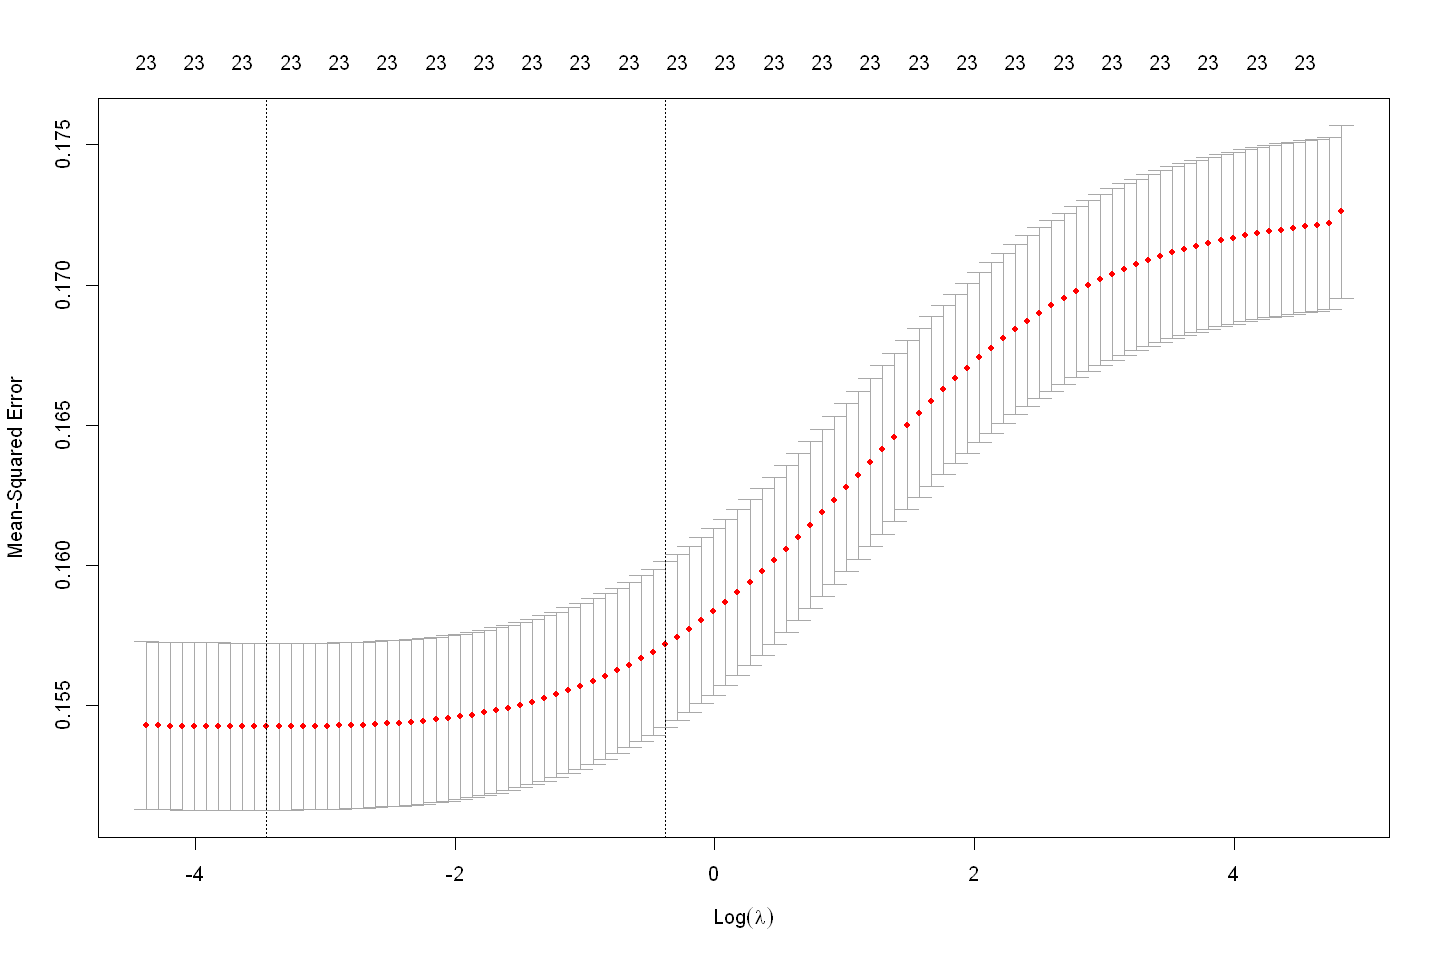

In [256]:
# cross validation for ridge Model
set.seed(613)
cv.out=cv.glmnet(x[train,],y[train],alpha=0)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam

In [257]:
# making prediction based on the best lambda
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 0.1520654

In [258]:
# using the best lambda we fit and predict model for all variables
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam)[1:24,]

(Intercept)     LIMIT_BAL           SEX     EDUCATION      MARRIAGE 
 3.067730e-01 -7.114174e-08 -1.016797e-02 -1.515673e-02 -1.883131e-02 
          AGE         PAY_0         PAY_2         PAY_3         PAY_4 
 1.146074e-03  8.274910e-02  1.823157e-02  1.390460e-02  6.284763e-03 
        PAY_5         PAY_6     BILL_AMT1     BILL_AMT2     BILL_AMT3 
 6.723511e-03  1.870126e-03 -3.421019e-07 -2.592142e-08  2.405317e-08 
    BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2 
-1.017146e-07  1.081209e-08  6.020963e-08 -7.869441e-07 -2.542696e-07 
     PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6 
-3.832457e-09 -6.062830e-07 -4.534761e-07 -2.131371e-07

#### 1.4. Lasso Regression

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"


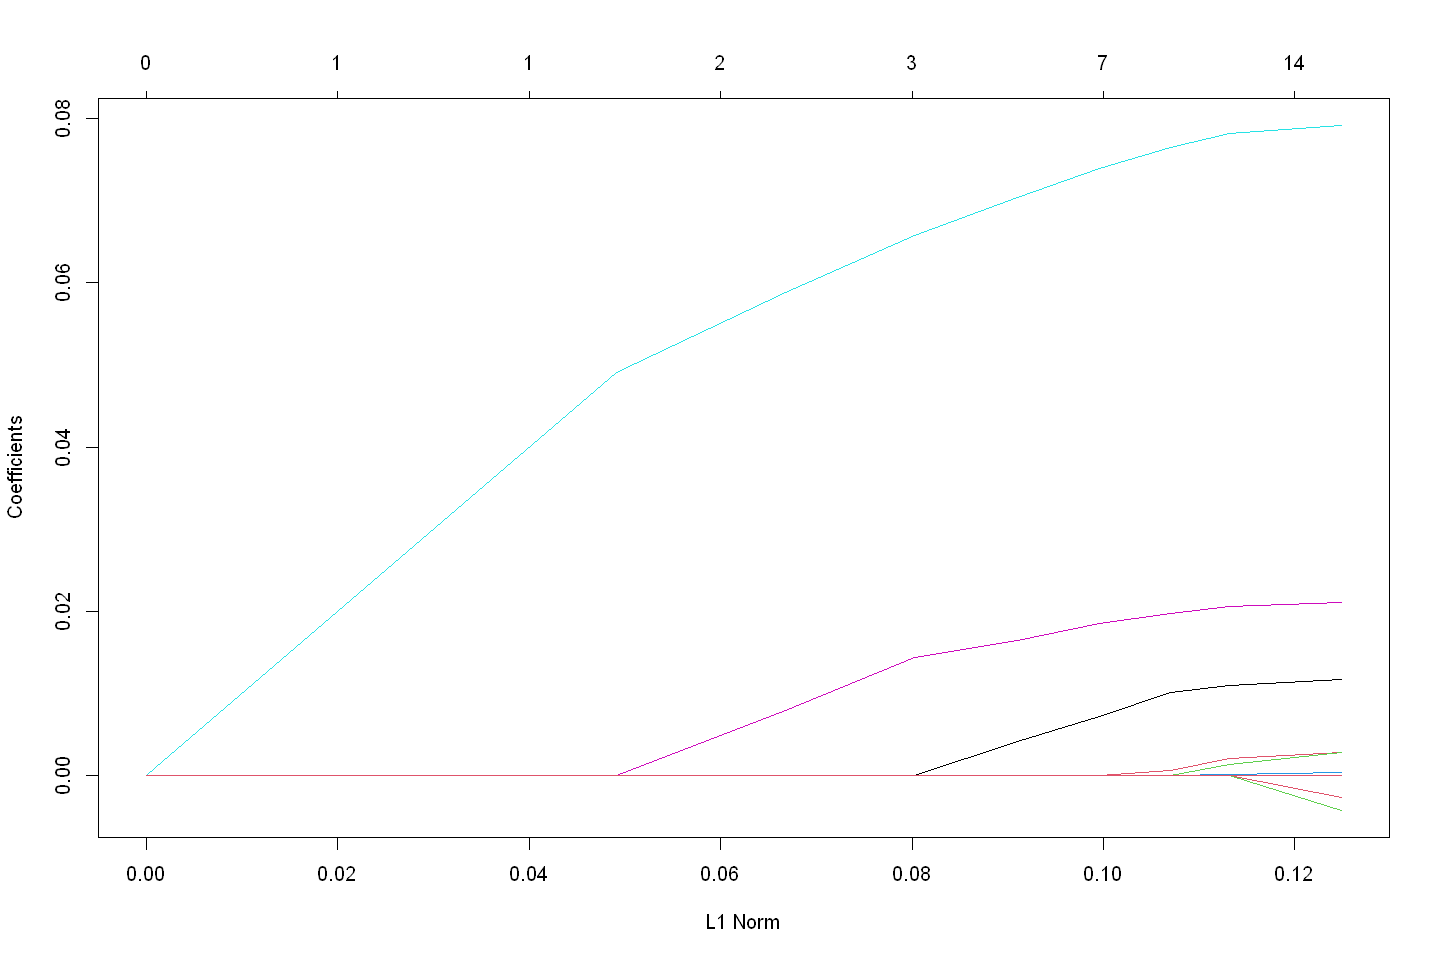

In [259]:
#fitting the model to train
lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
#ploting the results of lasso
plot(lasso.mod)

[1] 0.1523587

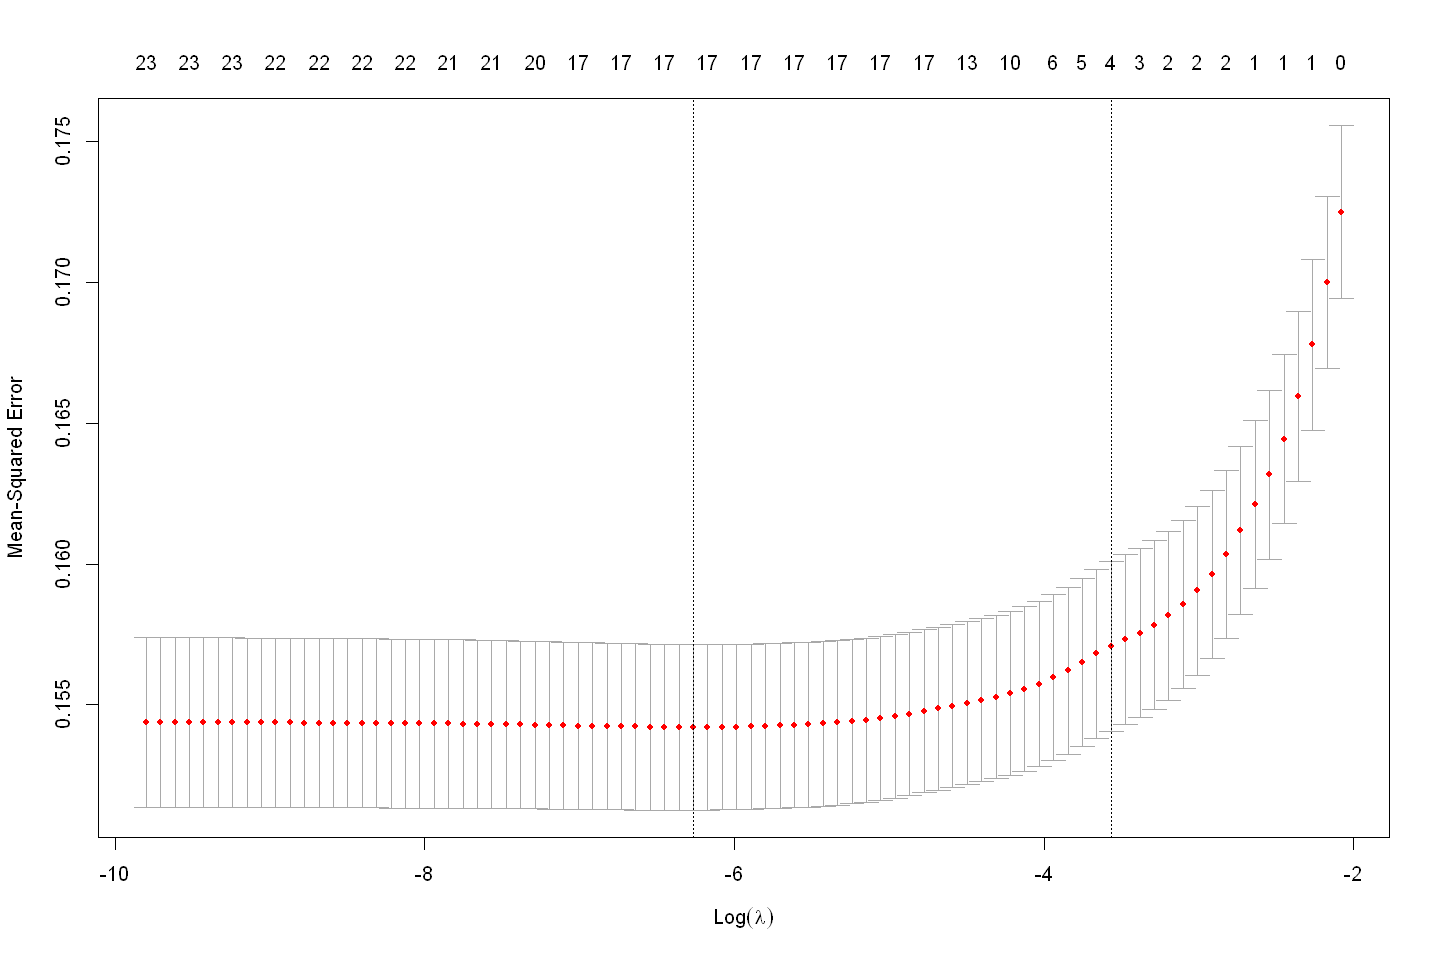

In [260]:
#cross validating
set.seed(613)
cv.out=cv.glmnet(x[train,],y[train],alpha=1)
#plot of cross validation
plot(cv.out)
# geting the best lambda
bestlam=cv.out$lambda.min
#prediction based on the best lambda
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])
# MSE of model for the best lambda
mean((lasso.pred-y.test)^2)

In [266]:
#fitting the lasso to all dafa frame
out=glmnet(x,y,alpha=1,lambda=grid)
#Geting the coeficents
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:24,]
lasso.coef
# variables with coeficient
lasso.coef[lasso.coef!=0]
# Get the name of selected variables by lasso
selection.lasso=names(lasso.coef[lasso.coef!=0])[-1]

(Intercept)     LIMIT_BAL           SEX     EDUCATION      MARRIAGE 
 2.530089e-01 -3.903907e-08  0.000000e+00  0.000000e+00 -2.618902e-03 
          AGE         PAY_0         PAY_2         PAY_3         PAY_4 
 1.100445e-04  8.970732e-02  1.332000e-02  1.234360e-02  2.399049e-03 
        PAY_5         PAY_6     BILL_AMT1     BILL_AMT2     BILL_AMT3 
 2.590667e-03  0.000000e+00 -2.881072e-07  0.000000e+00  0.000000e+00 
    BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2 
 0.000000e+00  0.000000e+00  0.000000e+00 -5.017266e-07  0.000000e+00 
     PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6 
 0.000000e+00 -2.127197e-07 -1.032020e-07  0.000000e+00

(Intercept)     LIMIT_BAL      MARRIAGE           AGE         PAY_0 
 2.530089e-01 -3.903907e-08 -2.618902e-03  1.100445e-04  8.970732e-02 
        PAY_2         PAY_3         PAY_4         PAY_5     BILL_AMT1 
 1.332000e-02  1.234360e-02  2.399049e-03  2.590667e-03 -2.881072e-07 
     PAY_AMT1      PAY_AMT4      PAY_AMT5 
-5.017266e-07 -2.127197e-07 -1.032020e-07

#### 1.5. PCR regression

In [283]:
# fiting model with cross validation
set.seed(2)
pcr.fit=pcr(default~., data=DF,scale=TRUE,validation="CV")
summary(pcr.fit)

Data: 	X dimension: 20000 23 
	Y dimension: 20000 1
Fit method: svdpc
Number of components considered: 23

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV          0.4147   0.4135   0.3972   0.3969   0.3969   0.3966   0.3965
adjCV       0.4147   0.4134   0.3972   0.3969   0.3969   0.3966   0.3964
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.3963   0.3962   0.3962    0.3962    0.3963    0.3922     0.392
adjCV   0.3963   0.3962   0.3962    0.3962    0.3963    0.3921     0.392
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        0.392    0.3908    0.3906    0.3905    0.3905    0.3905    0.3905
adjCV     0.392    0.3908    0.3906    0.3905    0.3905    0.3905    0.3905
       21 comps  22 comps  23 comps
CV       0.3904    0.3904    0.3904
adjCV    0.3904    0.3904    0.3904

TRAINING: % variance explained
         1 comps  2 comps  

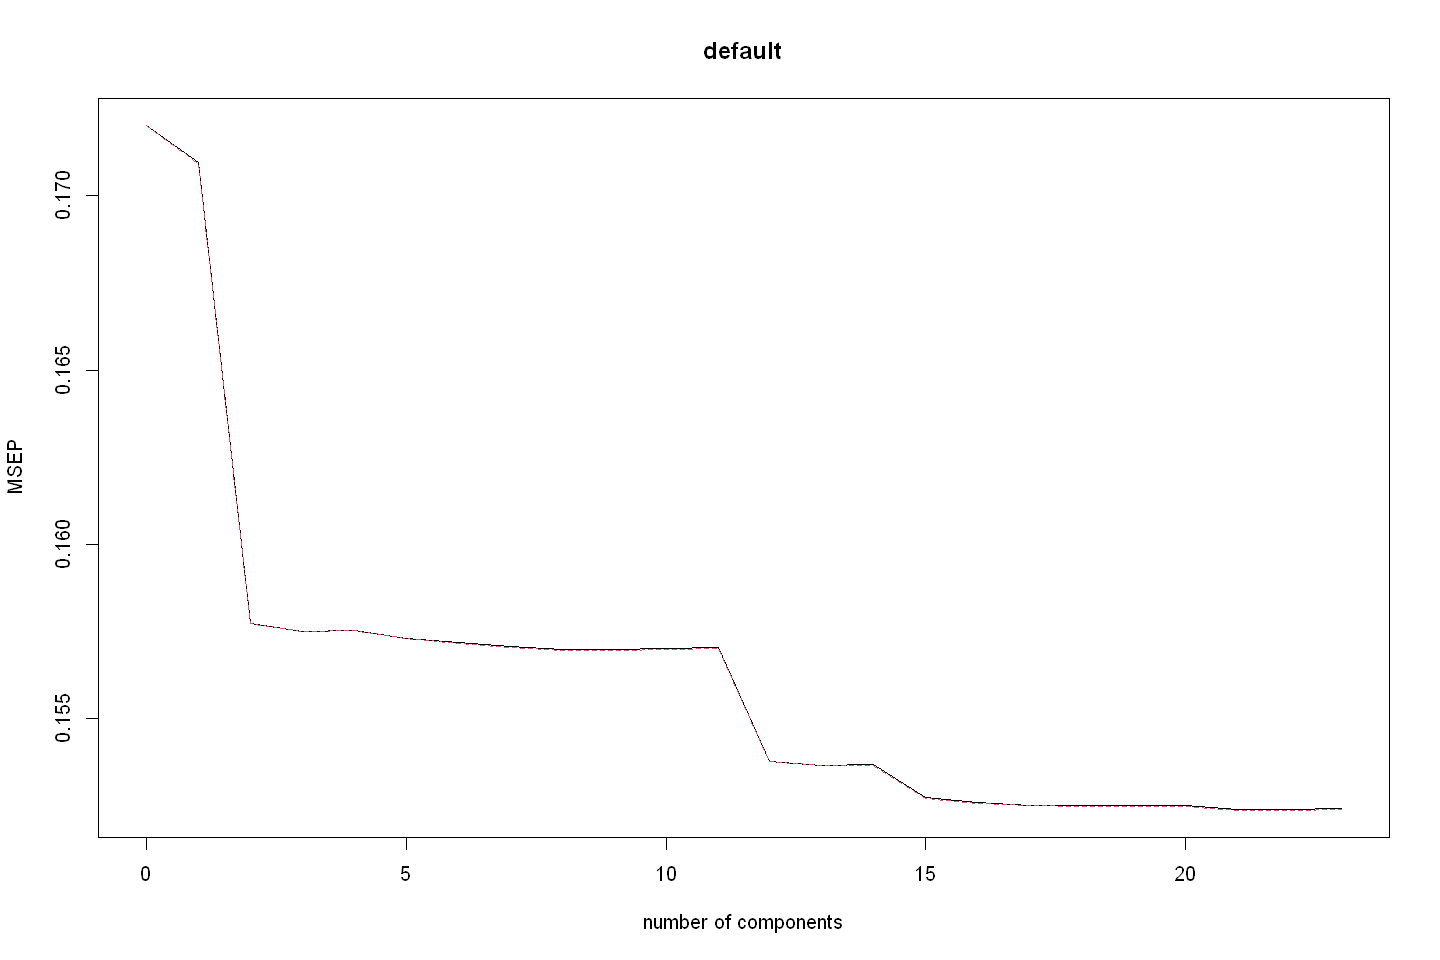

In [284]:
#plot of PCR
validationplot(pcr.fit,val.type="MSEP")

In [285]:
# Cross validation for PCR for train set
set.seed(613)
pcr.fit=pcr(default~., data=DF,subset=train,scale=TRUE, validation="CV")

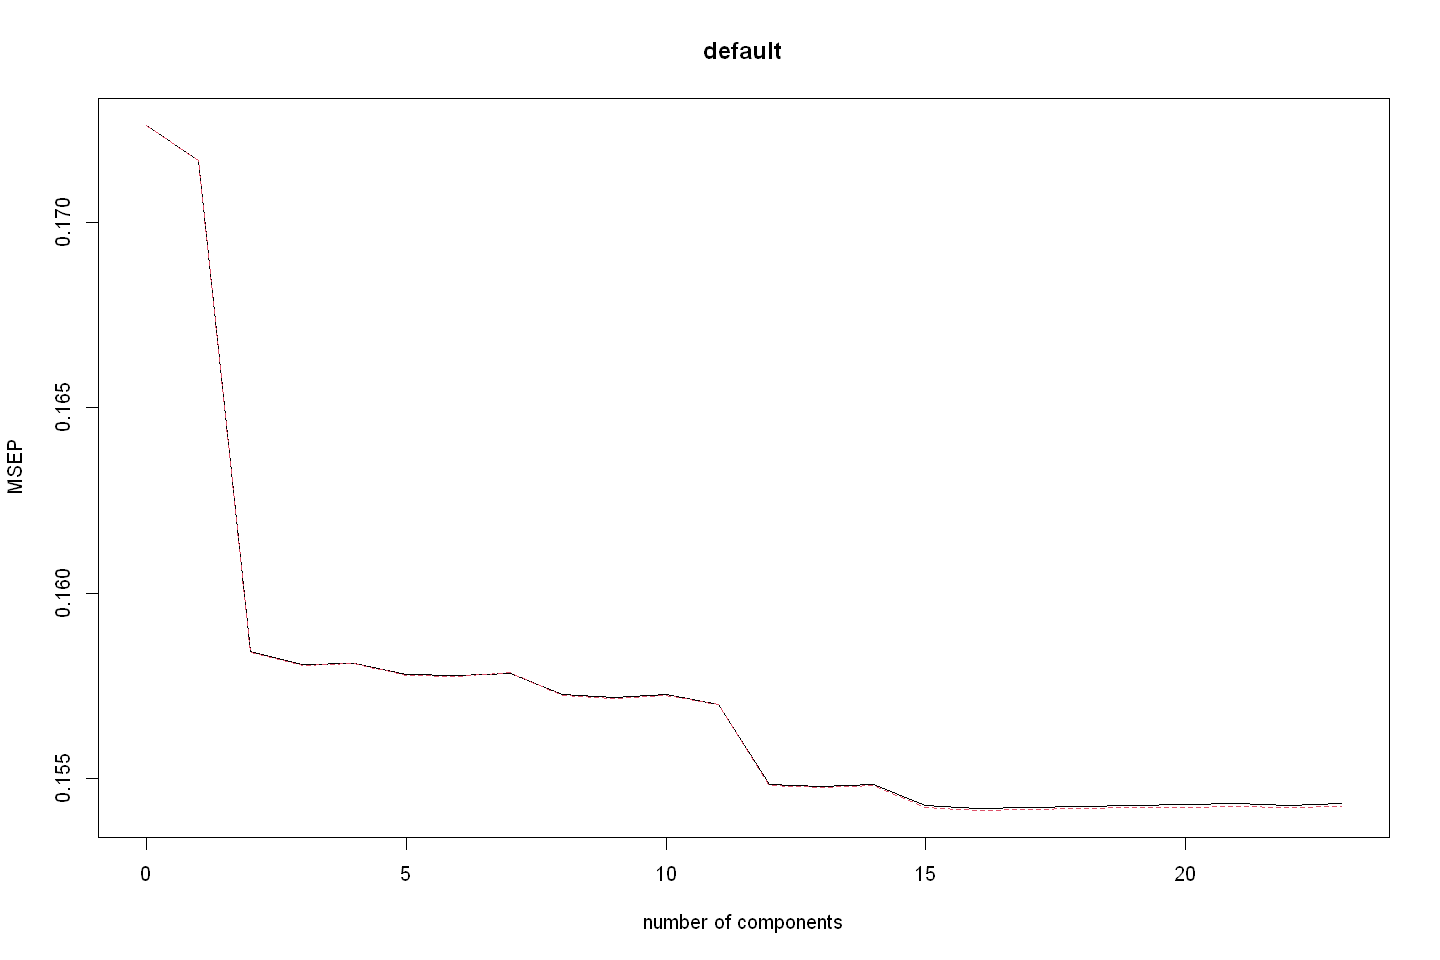

In [270]:
#ploting the results
validationplot(pcr.fit,val.type="MSEP")

In [286]:
#making prediction
pcr.pred=predict(pcr.fit,x[test,],ncomp=12)
#MSE calculation
mean((pcr.pred-y.test)^2)

[1] 0.1534926

In [287]:
#pcr fiting to whole data
pcr.fit=pcr(y~x,scale=TRUE,ncomp=12)
#summary of PCR
summary(pcr.fit)

Data: 	X dimension: 20000 23 
	Y dimension: 20000 1
Fit method: svdpc
Number of components considered: 12
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X   28.206   45.867   52.469   58.534   62.987   67.199   71.264   75.101
y    0.631    8.322    8.469    8.472    8.628    8.682    8.772    8.787
   9 comps  10 comps  11 comps  12 comps
X   78.873    82.562    85.922     88.85
y    8.877     8.903     8.904     10.72


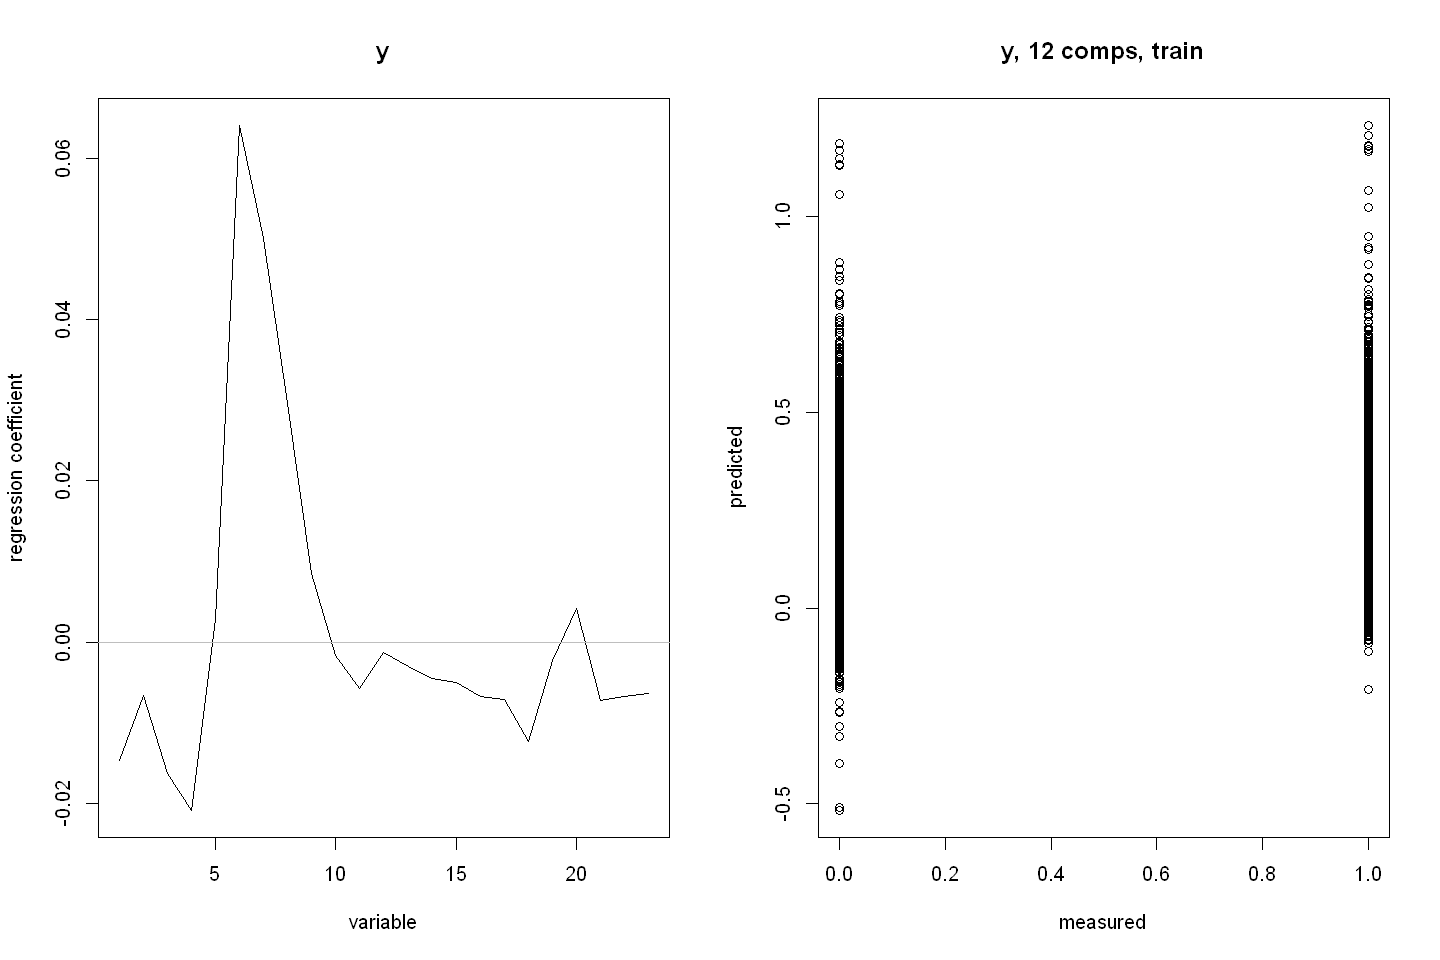

In [294]:
#paring axies to 2 cells
par(mfrow=c(1,2))
coefplot(pcr.fit)
predplot(pcr.fit)

#### 1.6. PCL

In [288]:
##fitting the model with cross validation to train data
set.seed(613)
pls.fit=plsr(default~., data=DF,subset=train,scale=TRUE, validation="CV")
# summary
summary(pls.fit)

Data: 	X dimension: 6666 23 
	Y dimension: 6666 1
Fit method: kernelpls
Number of components considered: 23

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV          0.4155   0.3966   0.3951   0.3931   0.3928   0.3927   0.3928
adjCV       0.4155   0.3966   0.3951   0.3930   0.3927   0.3927   0.3927
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.3928   0.3929   0.3928    0.3929    0.3928    0.3928    0.3928
adjCV   0.3927   0.3928   0.3927    0.3928    0.3928    0.3928    0.3928
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV       0.3928    0.3928    0.3928    0.3928    0.3928    0.3928    0.3928
adjCV    0.3928    0.3928    0.3928    0.3928    0.3928    0.3928    0.3928
       21 comps  22 comps  23 comps
CV       0.3928    0.3928    0.3928
adjCV    0.3928    0.3928    0.3928

TRAINING: % variance explained
         1 comps  2 comps

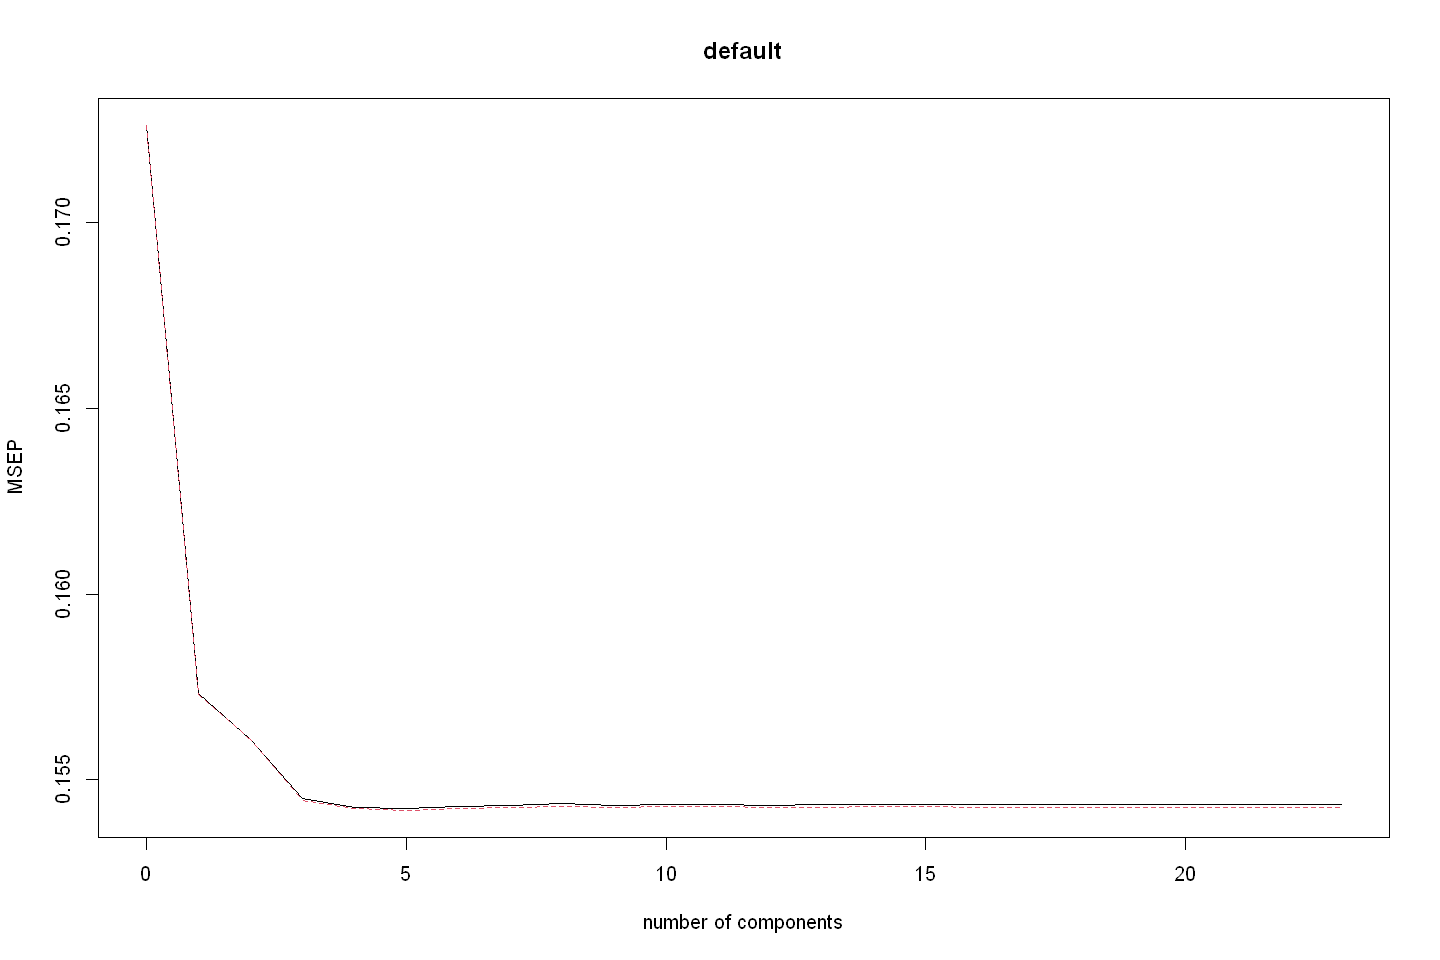

In [289]:
#ploting the result for train
validationplot(pls.fit,val.type="MSEP")

In [290]:
# making prediction
pls.pred=predict(pls.fit,x[test,],ncomp=4)
#calculating the MSE
mean((pls.pred-y.test)^2)

[1] 0.1521194

In [313]:
#fitting the model to whole data based on the number of component
pls.fit=plsr(default~., data=DF,scale=TRUE,ncomp=4)
#summary of model
summary(pls.fit)

Data: 	X dimension: 20000 23 
	Y dimension: 20000 1
Fit method: kernelpls
Number of components considered: 4
TRAINING: % variance explained
         1 comps  2 comps  3 comps  4 comps
X         19.315   42.718    49.27    54.43
default    9.076    9.959    11.35    11.50


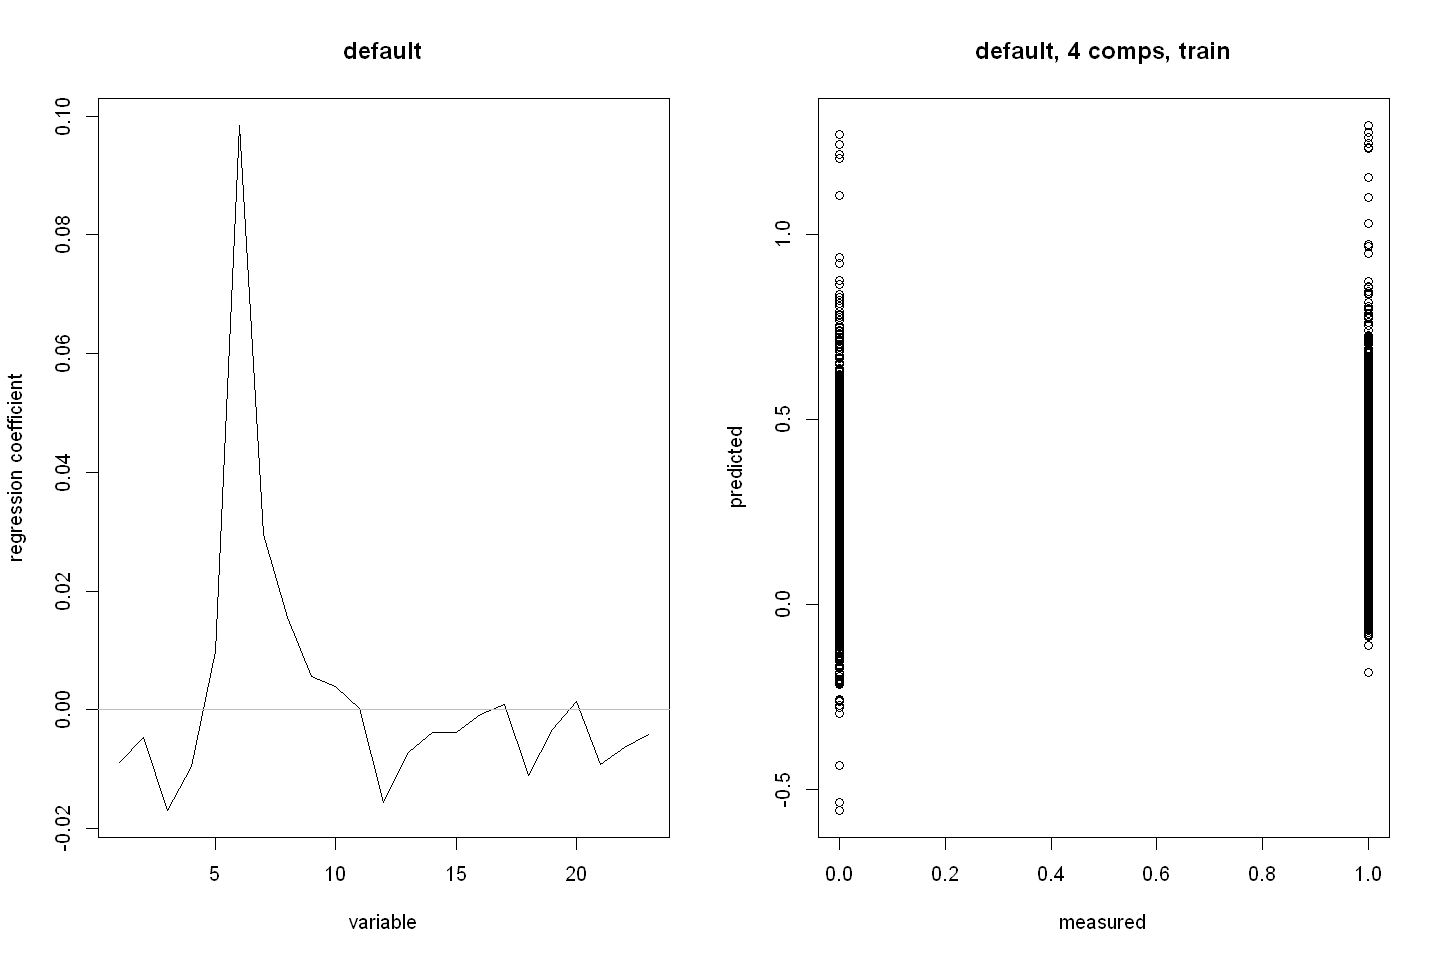

In [314]:
#paring axies to 2 cells
par(mfrow=c(1,2))
coefplot(pls.fit)
predplot(pls.fit)

In [297]:
# selection of forward model based on cp
print('best variables by forward cp')
selection.fwd.cp
# selection of forward model based on bic
print('best variables by forward bic')
selection.fwd.bic
# selection of backward model based on cp
print('best variables by backward cp')
selection.bwd.cp
# selection of backward model based on bic
print('best variables by backward bic')
selection.bwd.bic
# selection of best model by testing and cross validation
print('best variables by testing and cross validation')
selection.best
# selection of best model by Ridge Regression
print('best variables by Ridge Regression')
selection.ridge
# selection of best model by Lasso Regression
print('best variables by Lasso Regression')
selection.lasso

[1] "best variables by forward cp"


[1] "LIMIT_BAL" "SEX"       "EDUCATION" "MARRIAGE"  "AGE"       "PAY_0"    
 [7] "PAY_2"     "PAY_3"     "PAY_5"     "BILL_AMT1" "BILL_AMT2" "PAY_AMT1" 
[13] "PAY_AMT2"  "PAY_AMT4"  "PAY_AMT5"

[1] "best variables by forward bic"


[1] "LIMIT_BAL" "EDUCATION" "MARRIAGE"  "AGE"       "PAY_0"     "PAY_2"    
 [7] "PAY_3"     "BILL_AMT1" "PAY_AMT1"  "PAY_AMT4"

[1] "best variables by backward cp"


[1] "EDUCATION" "AGE"       "PAY_0"     "PAY_2"     "PAY_3"     "BILL_AMT1"
[7] "PAY_AMT1"  "PAY_AMT4"

[1] "best variables by backward bic"


[1] "EDUCATION" "AGE"       "PAY_0"     "PAY_2"     "PAY_3"     "BILL_AMT1"
[7] "PAY_AMT1"  "PAY_AMT4"

[1] "best variables by testing and cross validation"


[1] "LIMIT_BAL" "EDUCATION" "MARRIAGE"  "AGE"       "PAY_0"     "PAY_2"    
 [7] "PAY_3"     "PAY_5"     "BILL_AMT1" "PAY_AMT1"  "PAY_AMT4"  "PAY_AMT5"

[1] "best variables by Ridge Regression"


[1] "LIMIT_BAL" "SEX"       "EDUCATION" "MARRIAGE"  "AGE"       "PAY_0"    
 [7] "PAY_2"     "PAY_3"     "PAY_4"     "PAY_5"     "PAY_6"     "BILL_AMT1"
[13] "BILL_AMT2" "BILL_AMT3" "BILL_AMT4" "BILL_AMT5" "BILL_AMT6" "PAY_AMT1" 
[19] "PAY_AMT2"  "PAY_AMT3"  "PAY_AMT4"  "PAY_AMT5"  "PAY_AMT6"

[1] "best variables by Lasso Regression"


[1] "LIMIT_BAL" "MARRIAGE"  "AGE"       "PAY_0"     "PAY_2"     "PAY_3"    
 [7] "PAY_4"     "PAY_5"     "BILL_AMT1" "PAY_AMT1"  "PAY_AMT4"  "PAY_AMT5"

In [304]:
common.variables=intersect(
    intersect(
    intersect(
    intersect(
    intersect(
    intersect(selection.fwd.cp,selection.fwd.bic),
        selection.bwd.cp),
    selection.bwd.bic),
    selection.best),
    selection.ridge),
    selection.lasso)
common.variables

[1] "AGE"       "PAY_0"     "PAY_2"     "PAY_3"     "BILL_AMT1" "PAY_AMT1" 
[7] "PAY_AMT4"

### 2. ML Models

In [315]:
glm.fits=glm(I(default)~ AGE + PAY_0 + PAY_2 + PAY_3 + BILL_AMT1 + PAY_AMT1 + PAY_AMT4 
             ,data=DF,family=binomial)
summary(glm.fits)


Call:
glm(formula = I(default) ~ AGE + PAY_0 + PAY_2 + PAY_3 + BILL_AMT1 + 
    PAY_AMT1 + PAY_AMT4, family = binomial, data = DF)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1451  -0.6935  -0.5644  -0.3240   3.4926  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.407e+00  7.224e-02 -19.472  < 2e-16 ***
AGE          7.304e-03  1.937e-03   3.771 0.000162 ***
PAY_0        5.816e-01  2.140e-02  27.171  < 2e-16 ***
PAY_2        7.088e-02  2.404e-02   2.949 0.003193 ** 
PAY_3        1.510e-01  2.209e-02   6.835 8.22e-12 ***
BILL_AMT1   -2.131e-06  2.992e-07  -7.120 1.08e-12 ***
PAY_AMT1    -1.560e-05  2.723e-06  -5.728 1.01e-08 ***
PAY_AMT4    -1.098e-05  2.367e-06  -4.638 3.52e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21112  on 19999  degrees of freedom
Residual deviance: 18825  on 19992  degrees of freedom
AIC: 188

In [316]:
coef(glm.fits)

(Intercept)           AGE         PAY_0         PAY_2         PAY_3 
-1.406665e+00  7.303528e-03  5.815690e-01  7.088083e-02  1.509543e-01 
    BILL_AMT1      PAY_AMT1      PAY_AMT4 
-2.130621e-06 -1.559901e-05 -1.097622e-05

In [317]:
summary(glm.fits)$coef
summary(glm.fits)$coef[,4]

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.406665e+00,7.223940e-02,-19.472263,1.887469e-84
AGE,7.303528e-03,1.936670e-03,3.771179,1.624780e-04
PAY_0,5.815690e-01,2.140440e-02,27.170530,1.448681e-162
PAY_2,7.088083e-02,2.403932e-02,2.948538,3.192812e-03
PAY_3,1.509543e-01,2.208680e-02,6.834593,8.223841e-12
BILL_AMT1,-2.130621e-06,2.992329e-07,-7.120276,1.077113e-12
PAY_AMT1,-1.559901e-05,2.723057e-06,-5.728493,1.013265e-08
PAY_AMT4,-1.097622e-05,2.366547e-06,-4.638074,3.516702e-06


(Intercept)           AGE         PAY_0         PAY_2         PAY_3 
 1.887469e-84  1.624780e-04 1.448681e-162  3.192812e-03  8.223841e-12 
    BILL_AMT1      PAY_AMT1      PAY_AMT4 
 1.077113e-12  1.013265e-08  3.516702e-06

In [322]:
glm.probs=predict(glm.fits,newdata=DF,type="response")
glm.probs[1:10]


1          2          3          4          5          6          7 
0.21234749 0.46697790 0.21257706 0.20931145 0.58621921 0.22854237 0.23697677 
         8          9         10 
0.22601478 0.05254222 0.19621806

In [325]:
GLMDF<-DF
GLMDF$predict<- ifelse(glm.probs > 0.5, 1, 0)

In [335]:
confusion_matrix<-gmodels::CrossTable(GLMDF$predict,GLMDF$default)
confusion_matrix


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  20000 

 
              | GLMDF$default 
GLMDF$predict |         0 |         1 | Row Total | 
--------------|-----------|-----------|-----------|
            0 |     15215 |      3530 |     18745 | 
              |    25.224 |    89.068 |           | 
              |     0.812 |     0.188 |     0.937 | 
              |     0.976 |     0.800 |           | 
              |     0.761 |     0.176 |           | 
--------------|-----------|-----------|-----------|
            1 |       371 |       884 |      1255 | 
              |   376.756 |  1330.338 |           | 
              |     0.296 |     0.704 |     0.063 | 
              |     0.024 |     0.200 |           | 
              |     0.019 |     0.044 |           | 
--------------|--------

In [337]:

TP<-confusion_matrix$t[2,2]
FP<-confusion_matrix$t[2,1]
TN<-confusion_matrix$t[1,1]
FN<-confusion_matrix$t[1,2]

#accuracy
accuracy<-(TP + TN) / (TP + FP + TN + FN)
#Errors

err_1<-confusion_matrix$prop.col[2,1]
err_2<-confusion_matrix$prop.col[1,2]


print(paste('Accuracy is eual to =', accuracy))
print(paste('error Type One is eual to =', err_1))
print(paste('error Type Two is eual to =', err_2))

[1] "Accuracy is eual to = 0.80495"
[1] "error Type One is eual to = 0.0238034133196458"
[1] "error Type Two is eual to = 0.799728137743543"


In [ ]:
# Logistic Regression




glm.pred=rep("Down",1250)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction)
(507+145)/1250
mean(glm.pred==Direction)
train=(Year<2005)
Smarket.2005=Smarket[!train,]
dim(Smarket.2005)
Direction.2005=Direction[!train]
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fits,Smarket.2005,type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
mean(glm.pred!=Direction.2005)
glm.fits=glm(Direction~Lag1+Lag2,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fits,Smarket.2005,type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
106/(106+76)
predict(glm.fits,newdata=data.frame(Lag1=c(1.2,1.5),Lag2=c(1.1,-0.8)),type="response")

#### 2.1. GAMs 

In [309]:
library(gamclass)

In [311]:


CVgam(I(default)~s(AGE) + s(PAY_0) + s(PAY_2) + s(PAY_3) + s(BILL_AMT1) + s(PAY_AMT1) + s(PAY_AMT4) ,
              data = DF, nfold = 10, debug.level = 0, method = "GCV.Cp",
              printit = TRUE, cvparts = NULL, gamma = 1, seed = 613)

   GAMscale CV-mse-GAM  
     0.1388      0.1395 


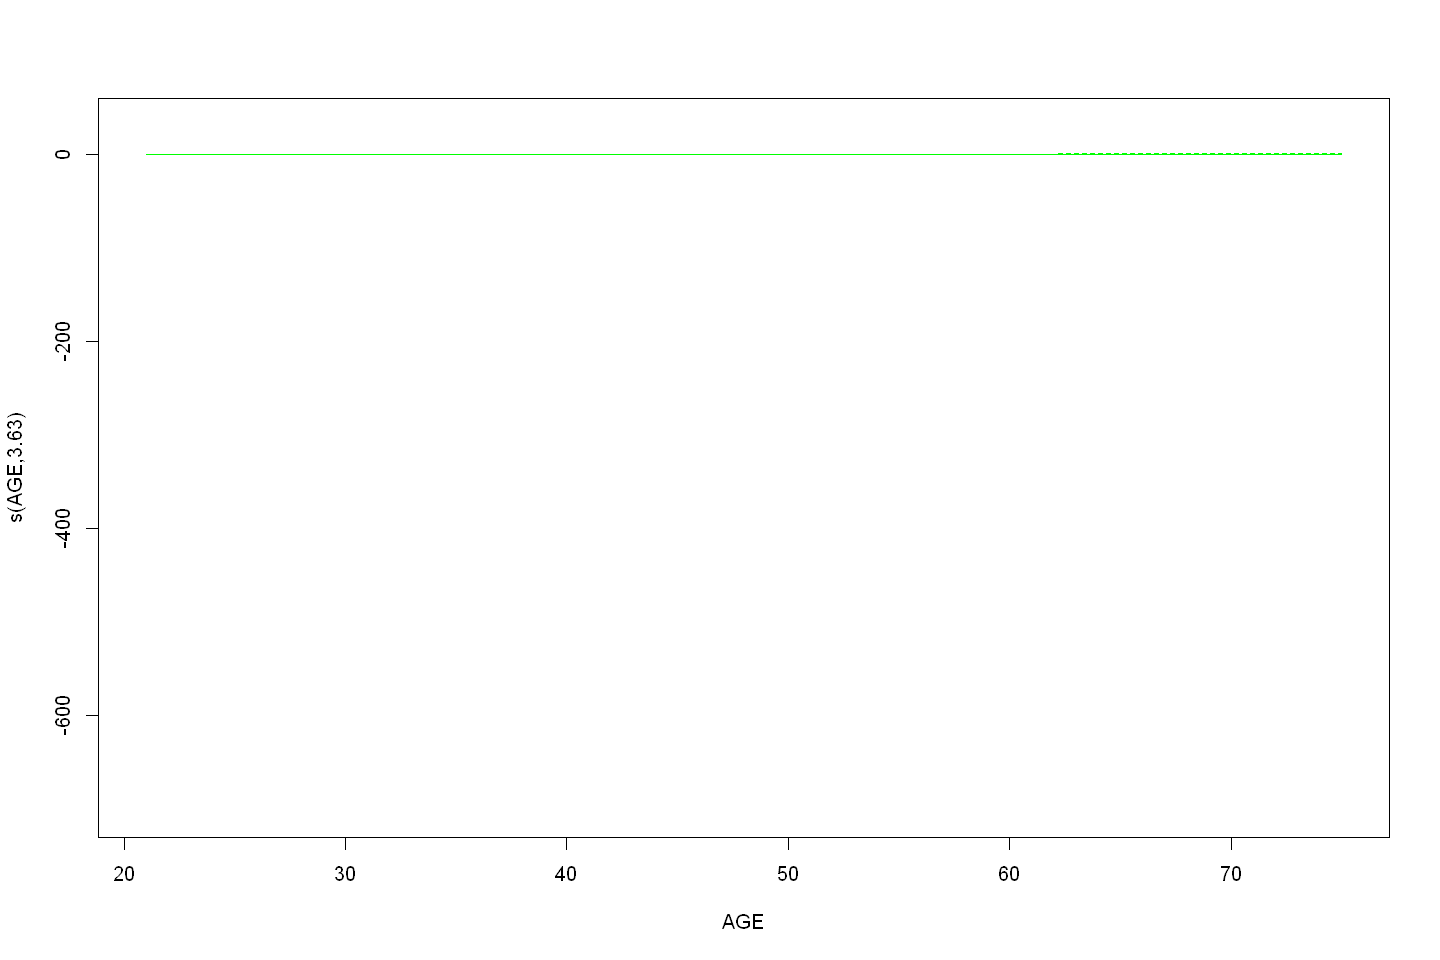

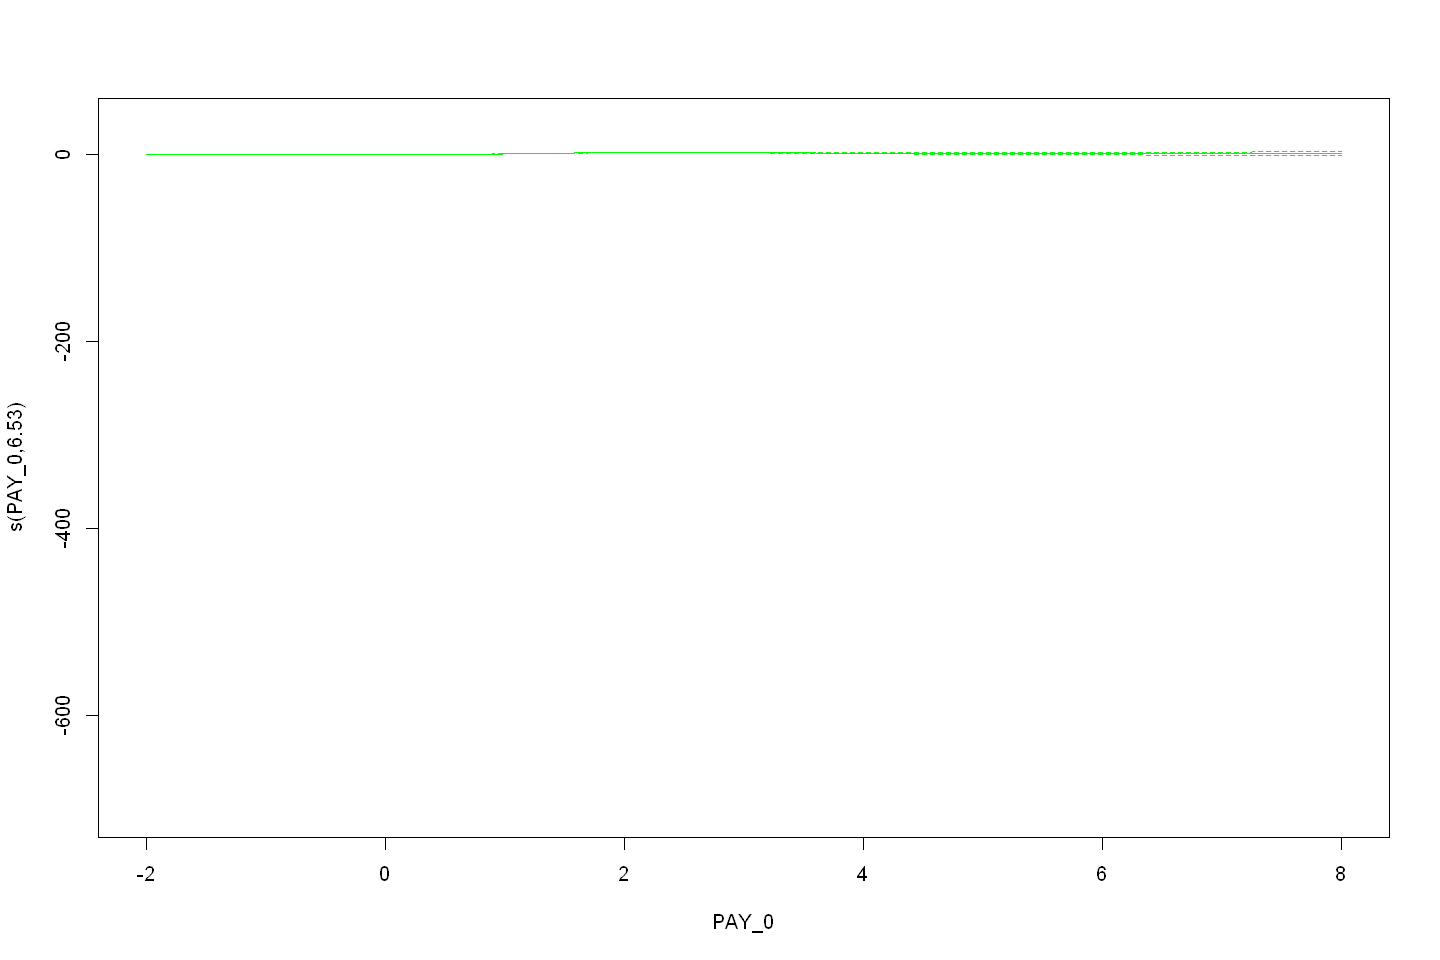

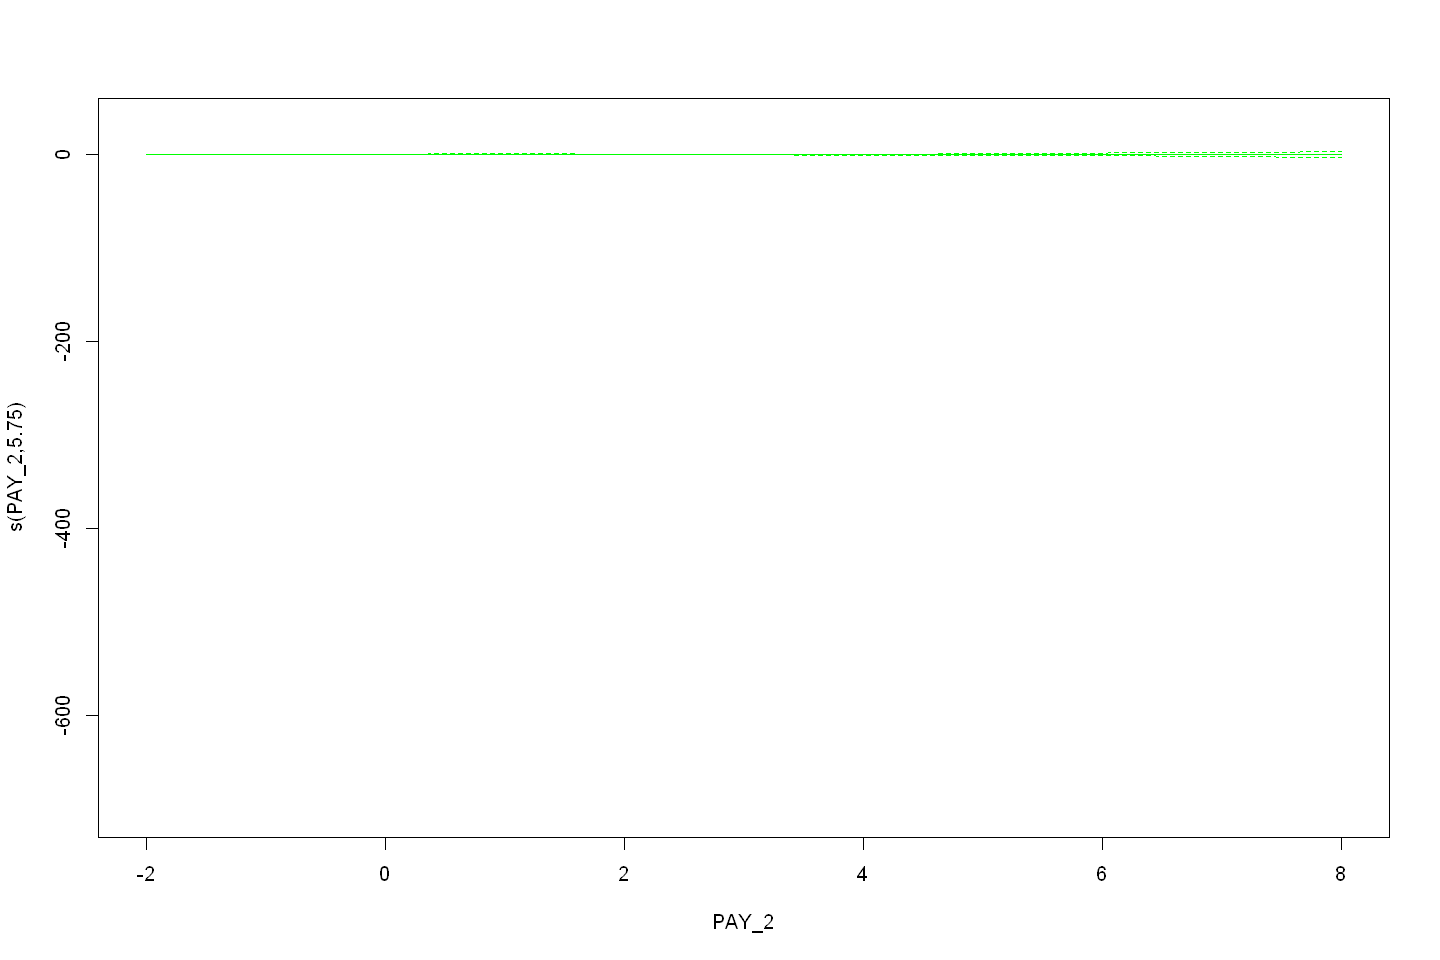

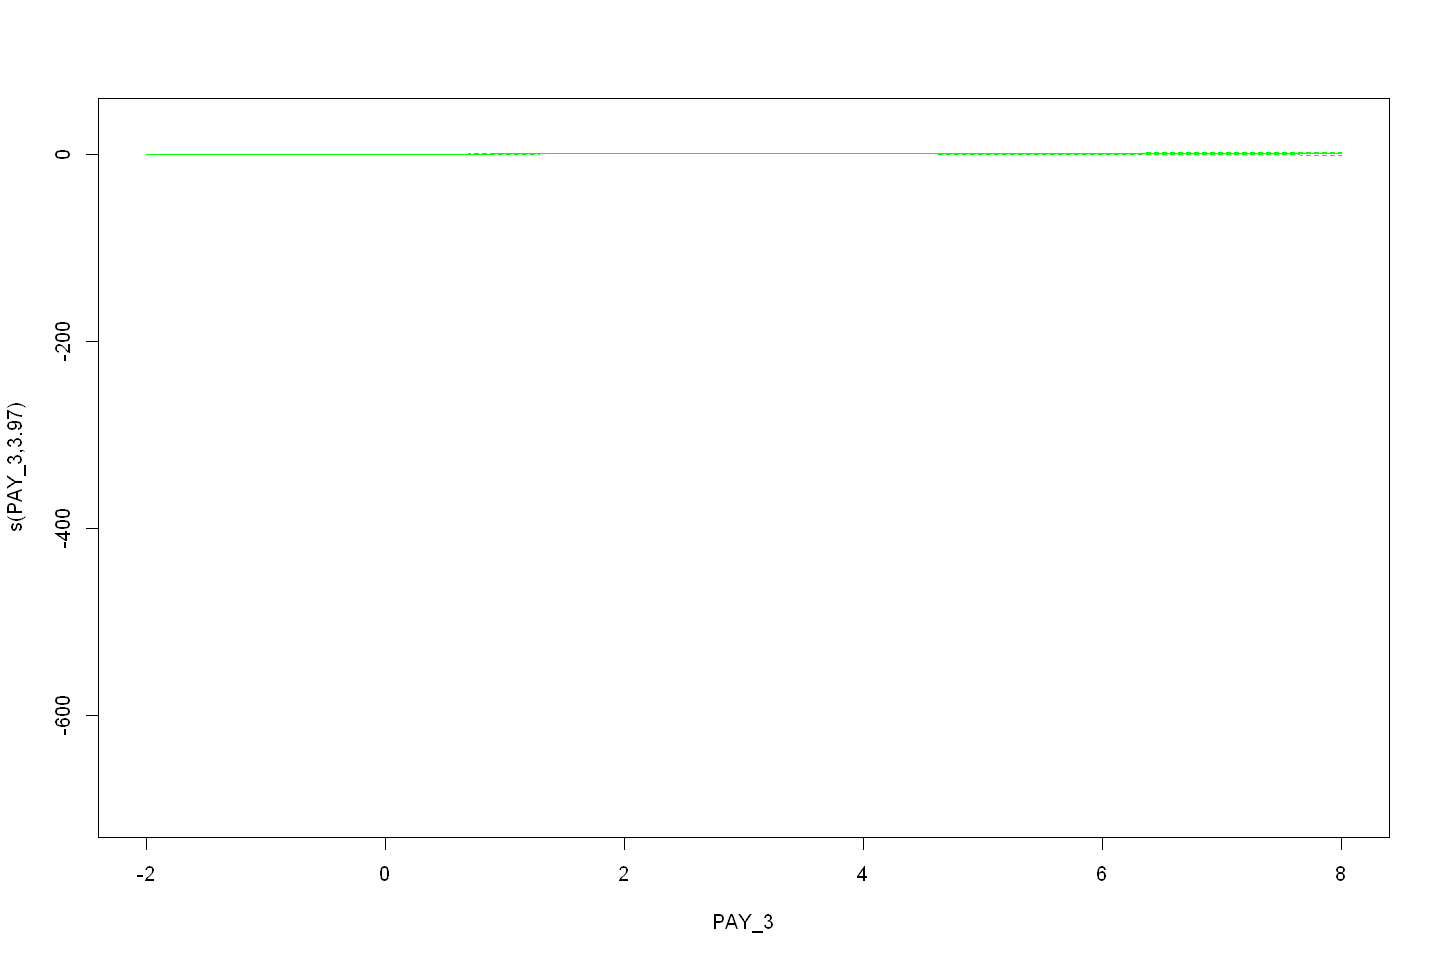

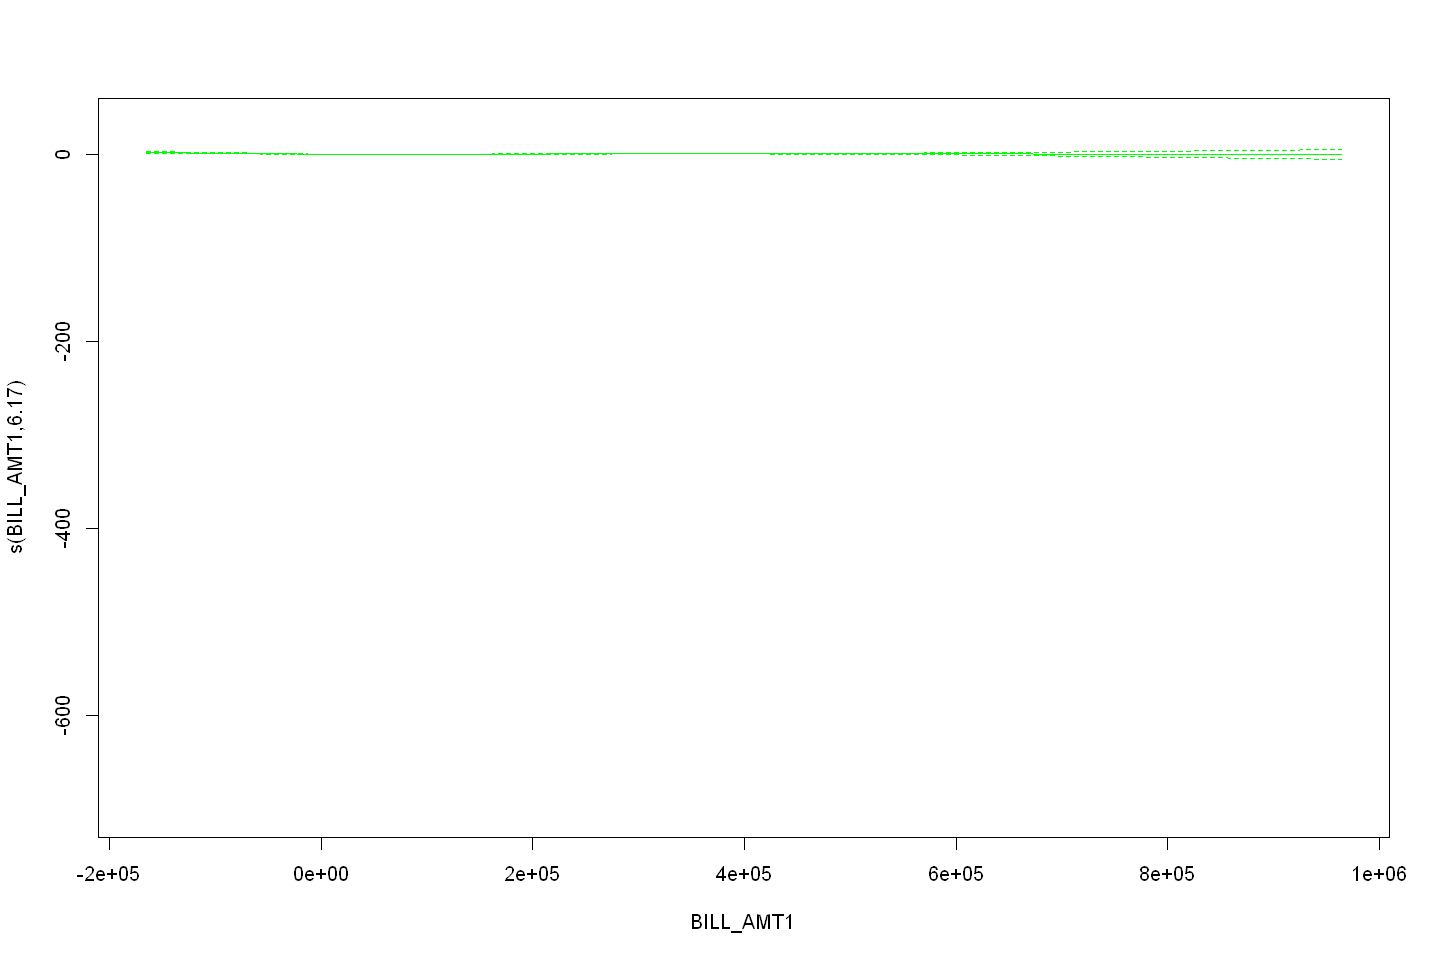

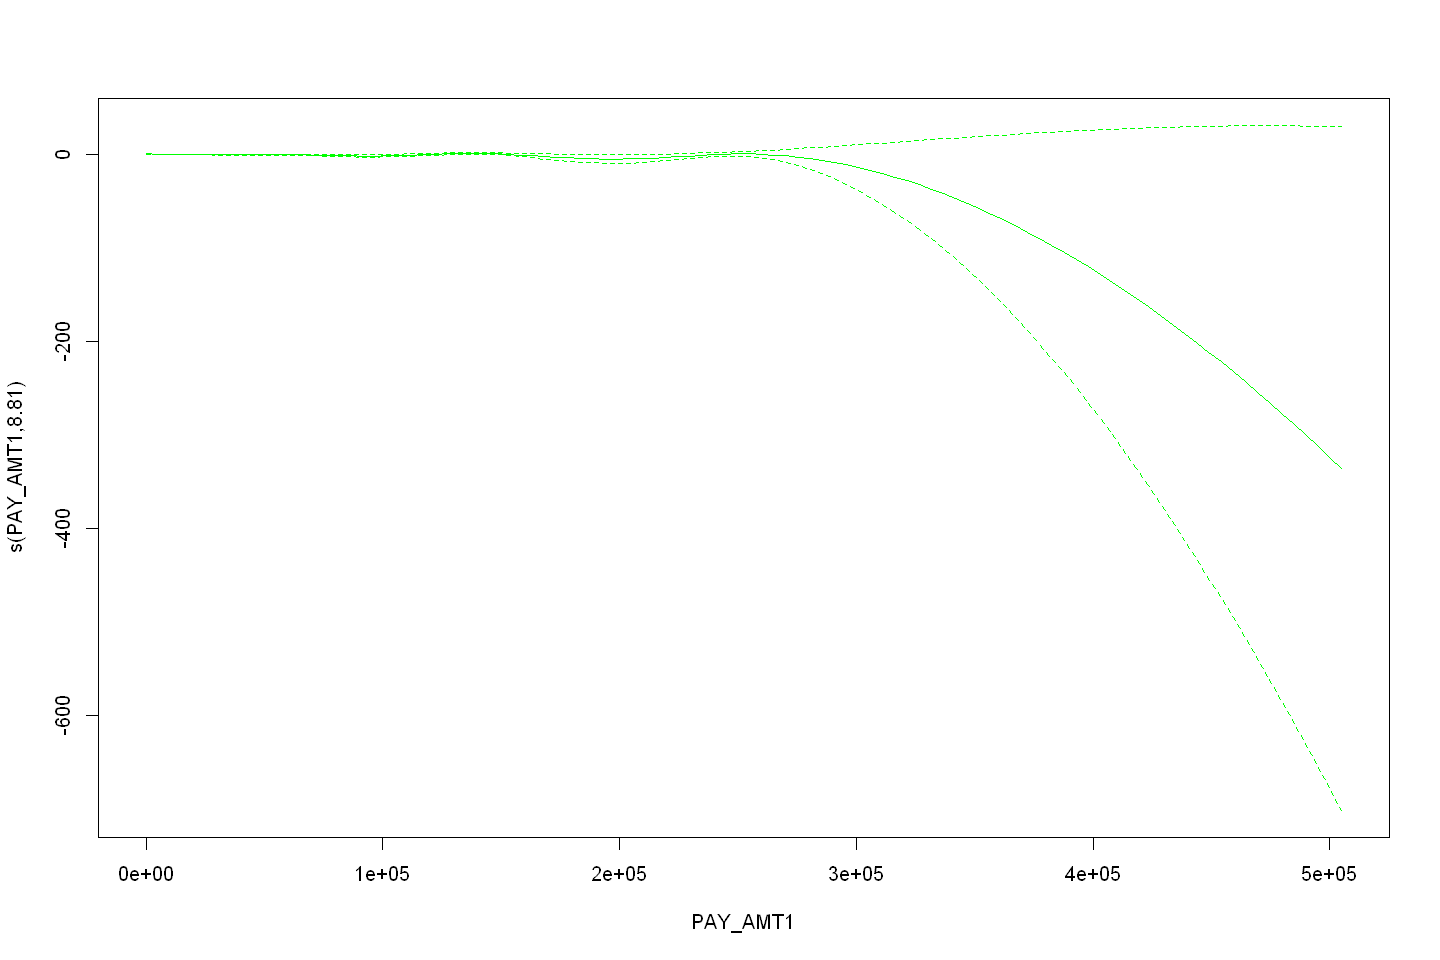

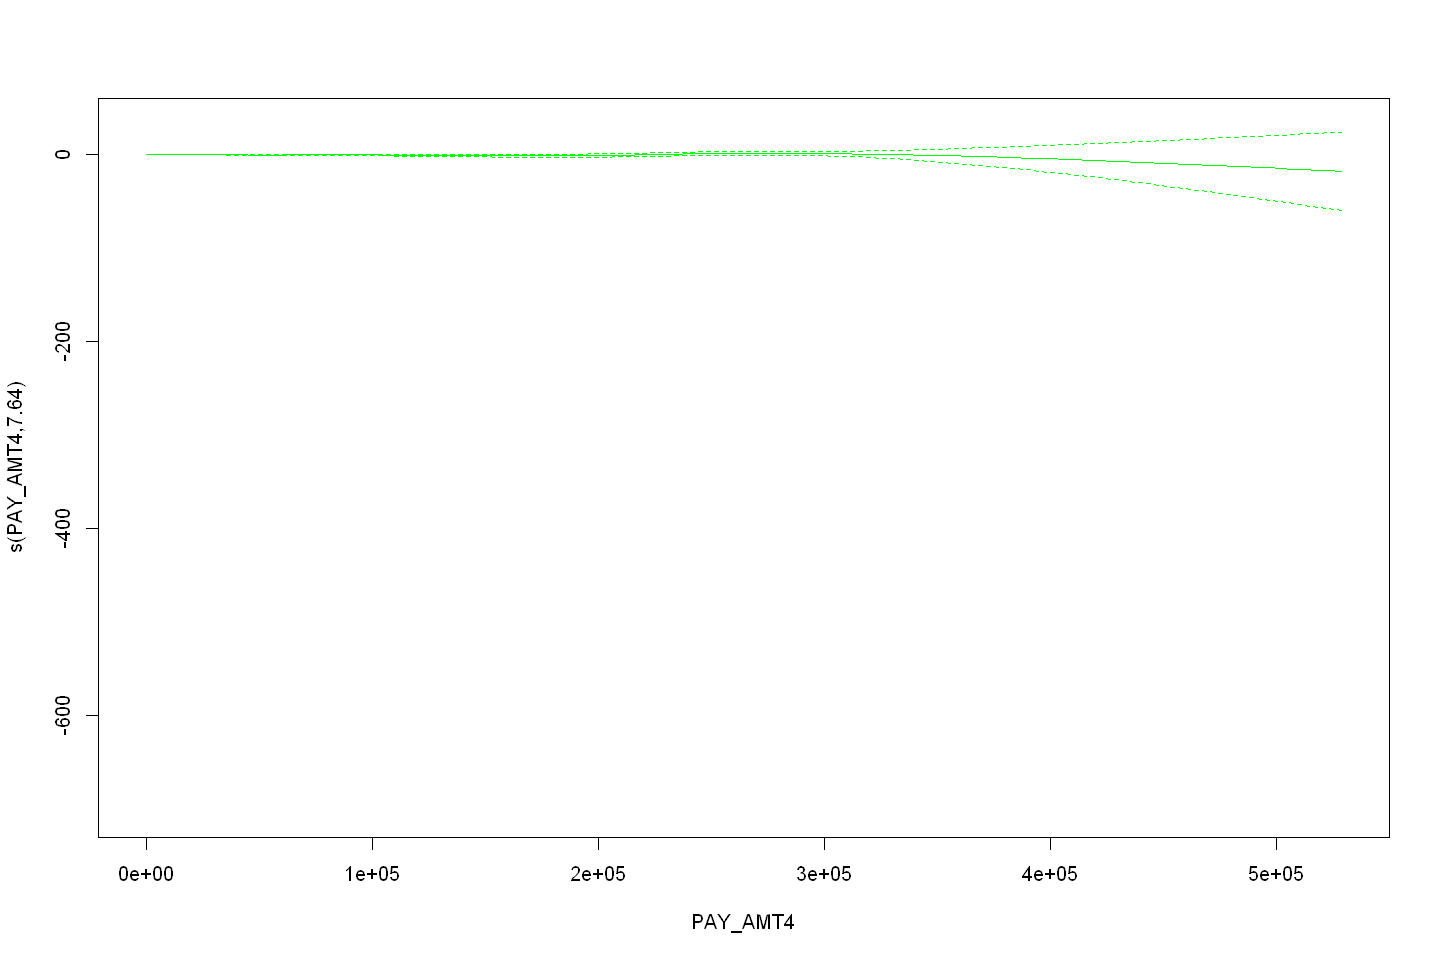

In [312]:
gam.lr.s=gam(I(default)~s(AGE) + s(PAY_0) + s(PAY_2) + s(PAY_3) + s(BILL_AMT1) + s(PAY_AMT1) + s(PAY_AMT4)
             ,family=binomial,data=DF[])
plot(gam.lr.s,se=T,col="green")

In [ ]:
gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)
par(mfrow=c(1,3))
plot(gam.m3, se=TRUE,col="blue")
plot.gam(gam1, se=TRUE, col="red")
gam.m1=gam(wage~s(age,5)+education,data=Wage)
gam.m2=gam(wage~year+s(age,5)+education,data=Wage)
anova(gam.m1,gam.m2,gam.m3,test="F")
summary(gam.m3)
preds=predict(gam.m2,newdata=Wage)
gam.lo=gam(wage~s(year,df=4)+lo(age,span=0.7)+education,data=Wage)
plot.gam(gam.lo, se=TRUE, col="green")
gam.lo.i=gam(wage~lo(year,age,span=0.5)+education,data=Wage)
library(akima)
plot(gam.lo.i)
gam.lr=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage)
par(mfrow=c(1,3))
plot(gam.lr,se=T,col="green")
table(education,I(wage>250))
gam.lr.s=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage,subset=(education!="1. < HS Grad"))
plot(gam.lr.s,se=T,col="green")


#### 2.2. Logistic Regression